# **<font color=#4285F4>Plan</font> Stage**
## Understand the business scenario and problem
The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They wants some data-driven suggestions based on the data. **They have the following question: what’s likely to make the employee leave the company?**

The goals in this project are to **analyze the data** collected by the HR department and to **build a model** that predicts whether or not an employee will leave the company.

If the client can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

## Step 1. Imports
* Import packages
* Load dataset

### Import packages

In [72]:
# Import basic data packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from xgboost import plot_importance

# Import modeling packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import metrics evaluation packages
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
    f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# This module lets us save our models once we fit them.
import pickle

# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Output folder setup
new_folders = ['EDA','evaluation','temp','model']
for folder_name in new_folders:
    folder_path = f"/kaggle/working/{folder_name}"
    # Check if the folder already exists, and create it if it doesn't
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)  # Use makedirs for creating nested directories if needed
        print(f"Folder '{folder_path}' created successfully.")
    else:
        print(f"Folder '{folder_path}' already exists.")

/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv
Folder '/kaggle/working/EDA' already exists.
Folder '/kaggle/working/evaluation' already exists.
Folder '/kaggle/working/temp' already exists.
Folder '/kaggle/working/model' already exists.


In [73]:
import warnings
warnings.filterwarnings("ignore")

### Load dataset

In [74]:
# Load dataset into a dataframe
df0 = pd.read_csv("/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv")

# Display first few rows of the dataframe
df0

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Department  salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales  medium  
3                          0      sales     low  
4                          0      sales     low  
...                      ...        ...     ...  
14994                      0    support     low  
14995                      0    support     low  
14996                      0    support     low  
14997                      0    support     low  
14998                      0    support     low  

[14999 rows x 10 columns]

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand variables
- Clean dataset (missing data, redundant data, outliers) 

### Gather basic information about the data

In [75]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [76]:
# Gather descriptive statistics about the data
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns
Standardize the column names so that they are all in snake_case, correct any column names that are misspelled, and make column names more concise as needed.

In [77]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [78]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [79]:
# Check for missing values
df0.isna().any()
df0.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_monthly_hours    False
tenure                   False
work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

### Check duplicates

In [80]:
# Check for duplicates
print(df0.duplicated().sum(),'rows contain duplicates.')
df0[df0.duplicated()]

3008 rows contain duplicates.


satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_monthly_hours  tenure  work_accident  left  \
396                      139       3              0     1   
866                      128       3              0     1   
1317                     127       3              0     1   
1368                     132       3              0     1   
1461                     142       3              0     1   
...                      ...     ...            ...   ...   
14994                    151       3              0     1   
14995                    160       3              0     1   
14996                    143       3              0     1   
14997                    280       4              0     1   
14998                    158       3              0     1   

       promotion_last_5years  department  salary  
396                        0       sales     low  
866                        0  accounting     low  
1317                       0       sales  medium  
1368                       0       RandD     low  
1461                       0       sales     low  
...                      ...         ...     ...  
14994                      0     support     low  
14995                      0     support     low  
14996                      0     support     low  
14997                      0     support     low  
14998                      0     support     low  

[3008 rows x 10 columns]

---

With several continuous variables across 10 columns, it seems highly unlikely that these observations are legitimate. It is acceptable to proceed by dropping them without further analysis.

---

In [81]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')
df1

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       average_monthly_hours  tenure  work_accident  left  \
0                        157       3              0     1   
1                        262       6              0     1   
2                        272       4              0     1   
3                        223       5              0     1   
4                        159       3              0     1   
...                      ...     ...            ...   ...   
11995                    259      10              1     0   
11996                    266      10              0     0   
11997                    185      10              0     0   
11998                    172      10              0     0   
11999                    180       3              0     0   

       promotion_last_5years  department  salary  
0                          0       sales     low  
1                          0       sales  medium  
2                          0       sales  medium  
3                          0       sales     low  
4                          0       sales     low  
...                      ...         ...     ...  
11995                      1  management    high  
11996                      1  management    high  
11997                      1  management    high  
11998                      1   marketing    high  
11999                      0          IT     low  

[11991 rows x 10 columns]

### Check outliers
Based on the descriptive statistics of the data, outliers are present in the **`tenure`** column.

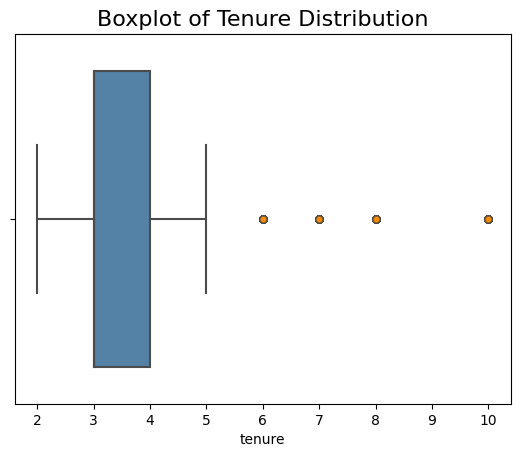

In [82]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(data=df1, x='tenure', whis=1.5, 
            flierprops=dict(marker='o', 
                            markerfacecolor='darkorange',
                            linewidth=0,alpha=0.5),
            color='steelblue',
            ) # layout location
plt.title('Boxplot of Tenure Distribution',fontsize=16,
                  ) # title location
plt.show()

---
The boxplot above shows that there are outliers in the `tenure` variable. 

It would be helpful to investigate how many rows in the data contain outliers in the `tenure` column.

---

In [83]:
# Determine the number of rows containing outliers 
# Calculate the parameters for detecting outliers 
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit for `tenure`:", lower_limit)
print("Upper limit for `tenure`:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print('There are ', len(outliers)," rows containing outliers in `tenure`")

Lower limit for `tenure`: 1.5
Upper limit for `tenure`: 5.5
There are  824  rows containing outliers in `tenure`


# **<font color=#DB4437>Analyze</font> Stage**

## Step 2. Data Exploration (Continue EDA)¶
Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [84]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True).round(3)*100)

left
0    10000
1     1991
Name: count, dtype: int64

left
0    83.4
1    16.6
Name: proportion, dtype: float64


### Data visualizations

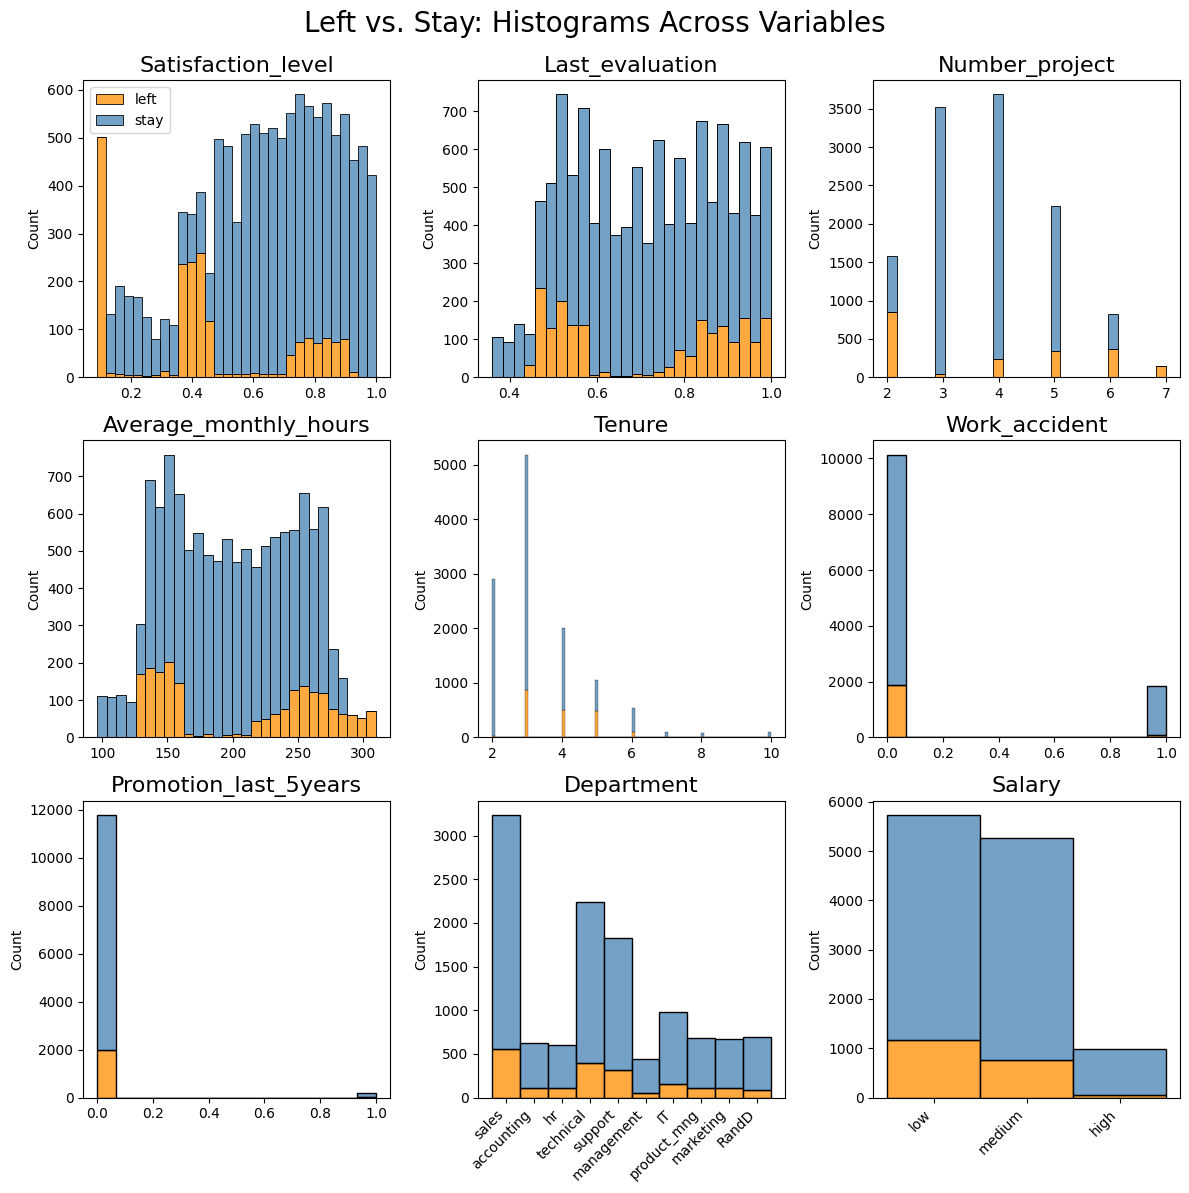

In [85]:
# Left vs. Stay: Histograms Across Variables
x_list = ['satisfaction_level', 'last_evaluation', 
          'number_project', 'average_monthly_hours', 'tenure',
          'work_accident', 'promotion_last_5years', 
          'department', 'salary']
y_val = 'left'
    
# Setup figure layout
fig, axes = plt.subplots(3, 3, figsize=(12,12))
    
# Plot histogram for each x_val
axes_flat = axes.flatten()
for i in range(len(x_list)):
    ax = axes_flat[i] 
    x_val = x_list[i]
    sns.histplot(data=df1, x=x_val, hue=y_val, multiple="stack",
                 palette=['steelblue','darkorange'],
                 ax=ax) # subplot location    
    
    # Remove individual subplot legends except the first one
    if i>0:
        ax.legend().remove()
    else:
        ax.legend(labels=['left','stay'], loc='upper left')

    # Set ax and title
    if df1[x_val].dtype=='object':
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_xlabel(None)
    ax.set_title('{}'.format(x_val.capitalize()),
                   fontsize=16,
                   ) # title location

# Layout setting
fig.suptitle('Left vs. Stay: Histograms Across Variables', 
             fontsize=20, y=0.99)
fig.tight_layout()

# Display and save
plt.show()
fig.savefig('EDA/attrition_hist.png')
plt.close()

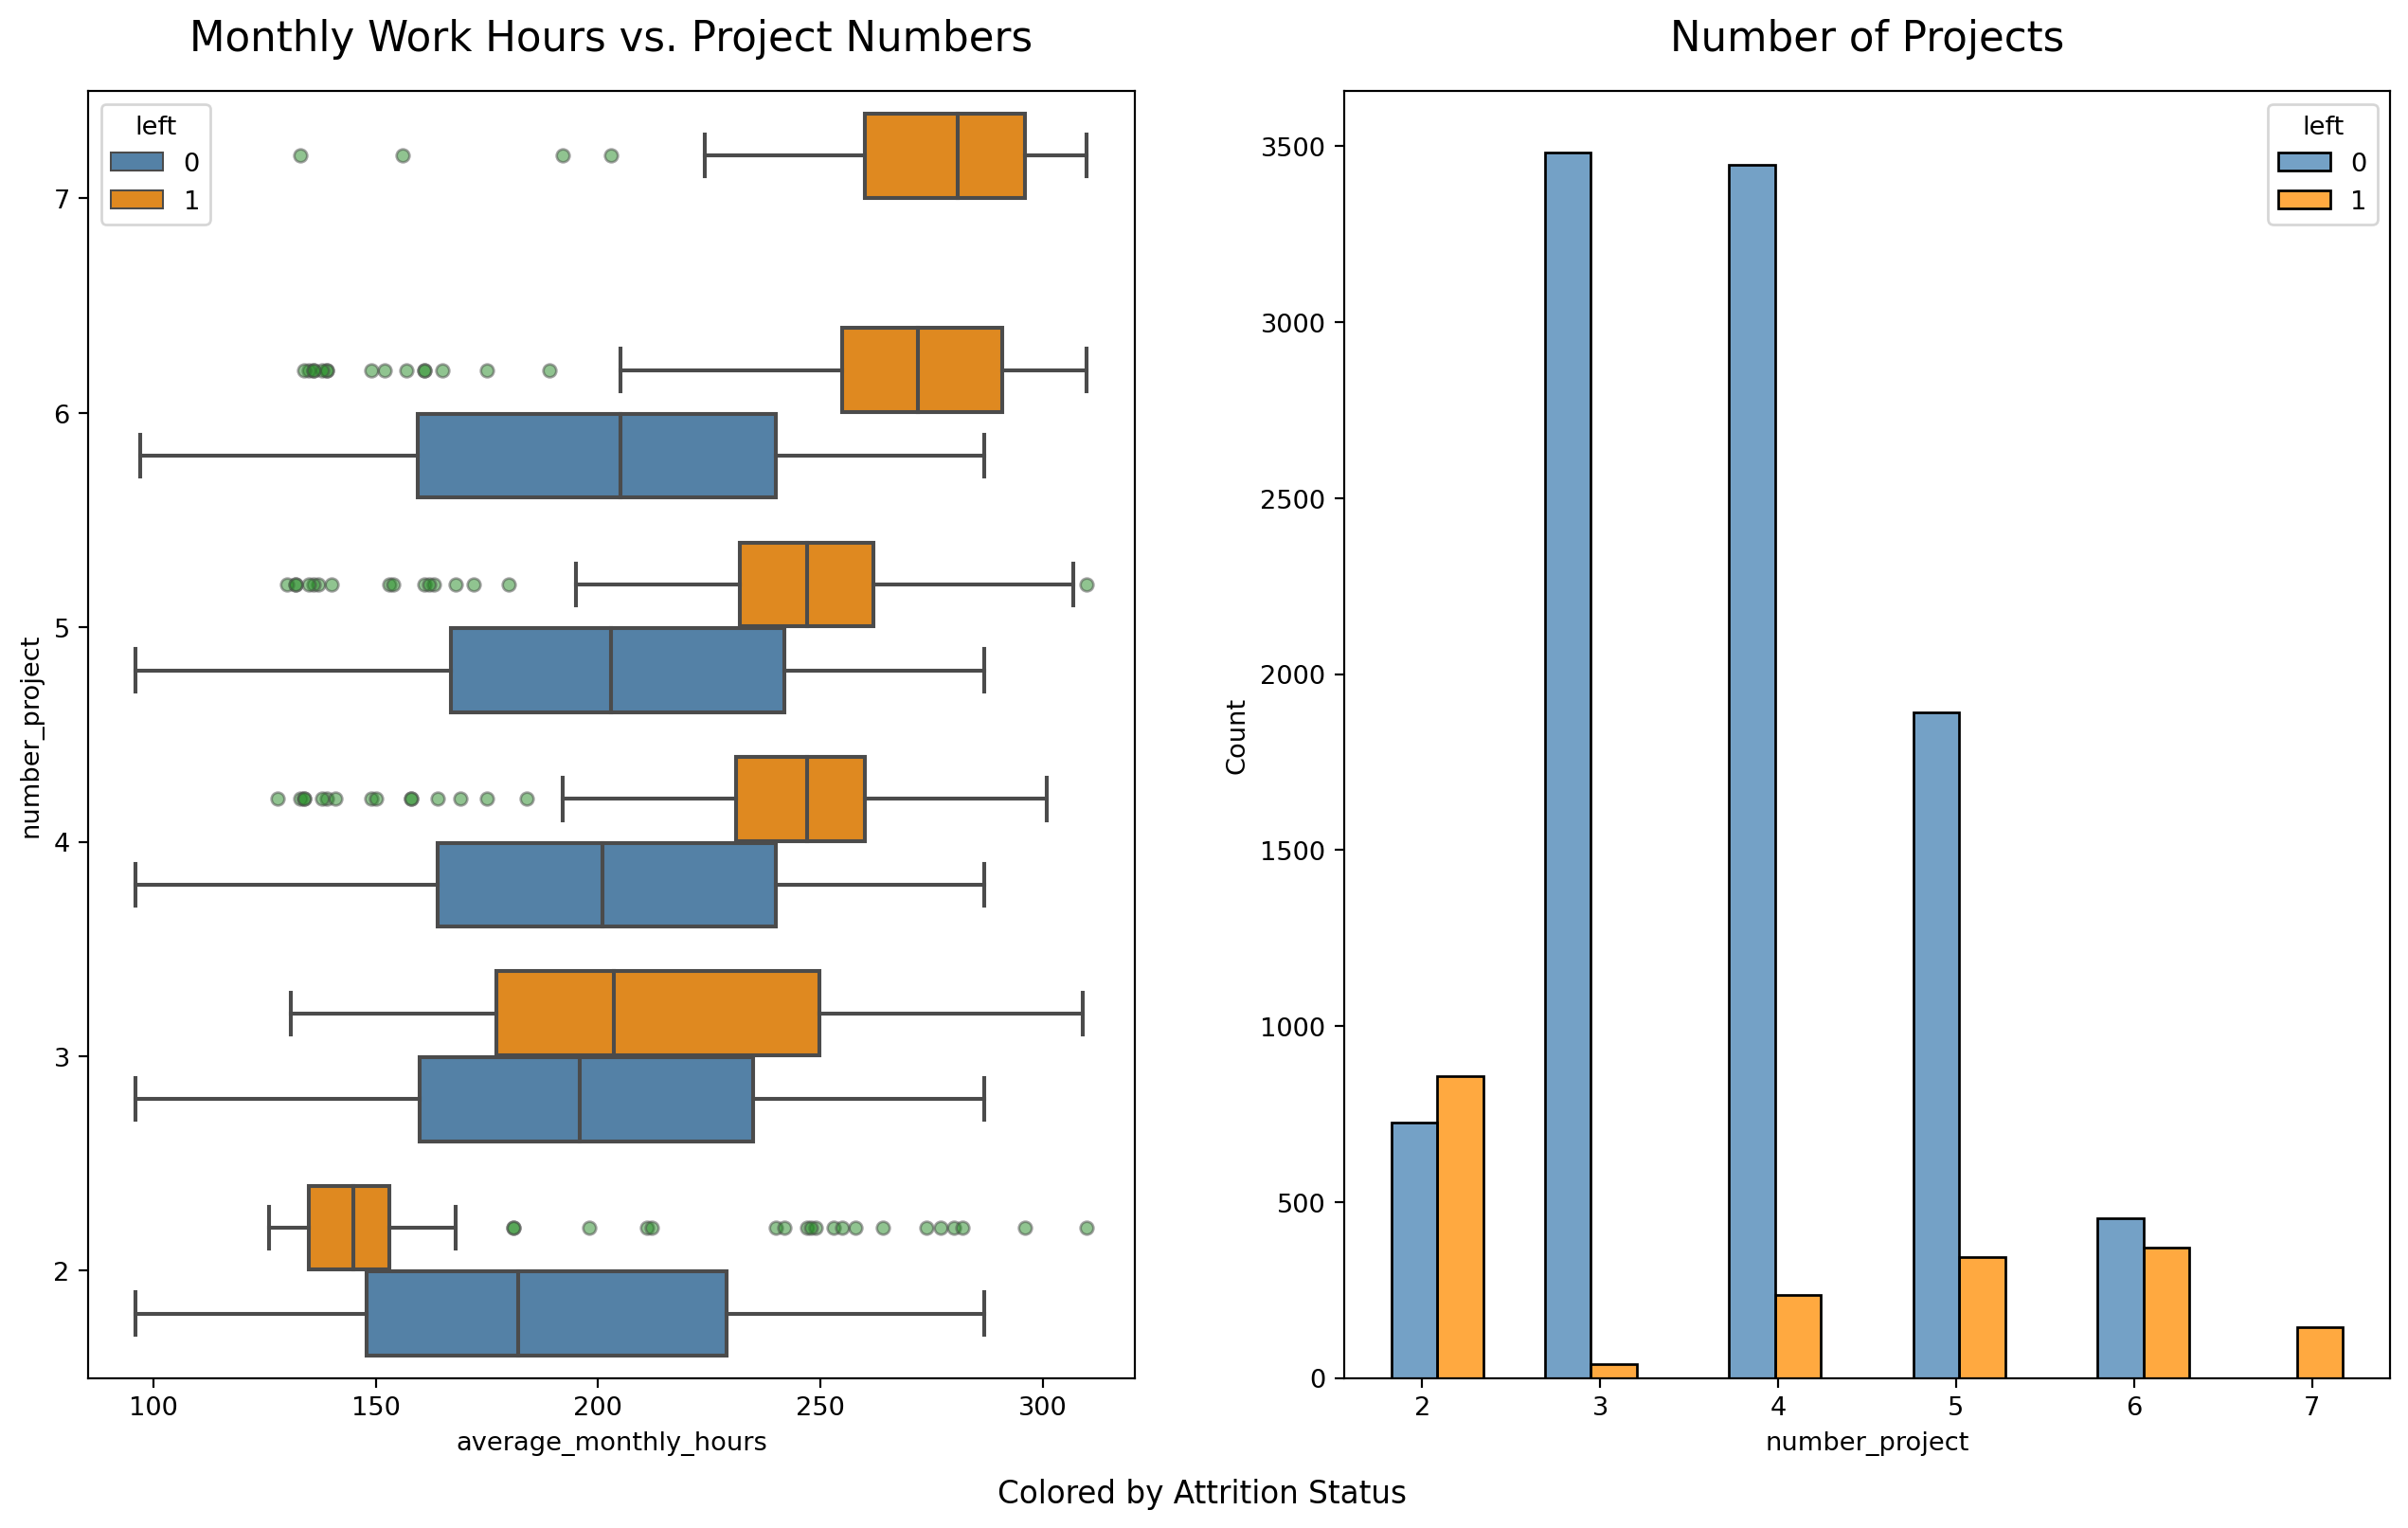

In [86]:
fig, axes = plt.subplots(1,2, figsize=(16,9), dpi=196)

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', 
            hue='left', orient='h',
            flierprops=dict(marker='o', 
                            markerfacecolor='forestgreen',
                            linewidth=0,alpha=0.5),
            palette=['steelblue','darkorange'],
            ax=axes[0]) # layout location

axes[0].invert_yaxis()
axes[0].set_title('Monthly Work Hours vs. Project Numbers',
                  fontsize=16, pad=16)

# Histogram showing projects number done by employees left vs stayed
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge',
             shrink=3, label=y_val,
             palette=['steelblue','darkorange'],
             ax=axes[1]) # layout location
axes[1].set_title('Number of Projects',
                  fontsize=16, pad=16)

# subtitle for color
fig.suptitle('Colored by Attrition Status',y=0.05)

# Display and save
plt.show()
fig.savefig('EDA/workHrs-projectNum-left.png')
plt.close()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

---
This conclution provided by exemplar

In [87]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

---
This confirms that all employees with 7 projects did leave. 

---

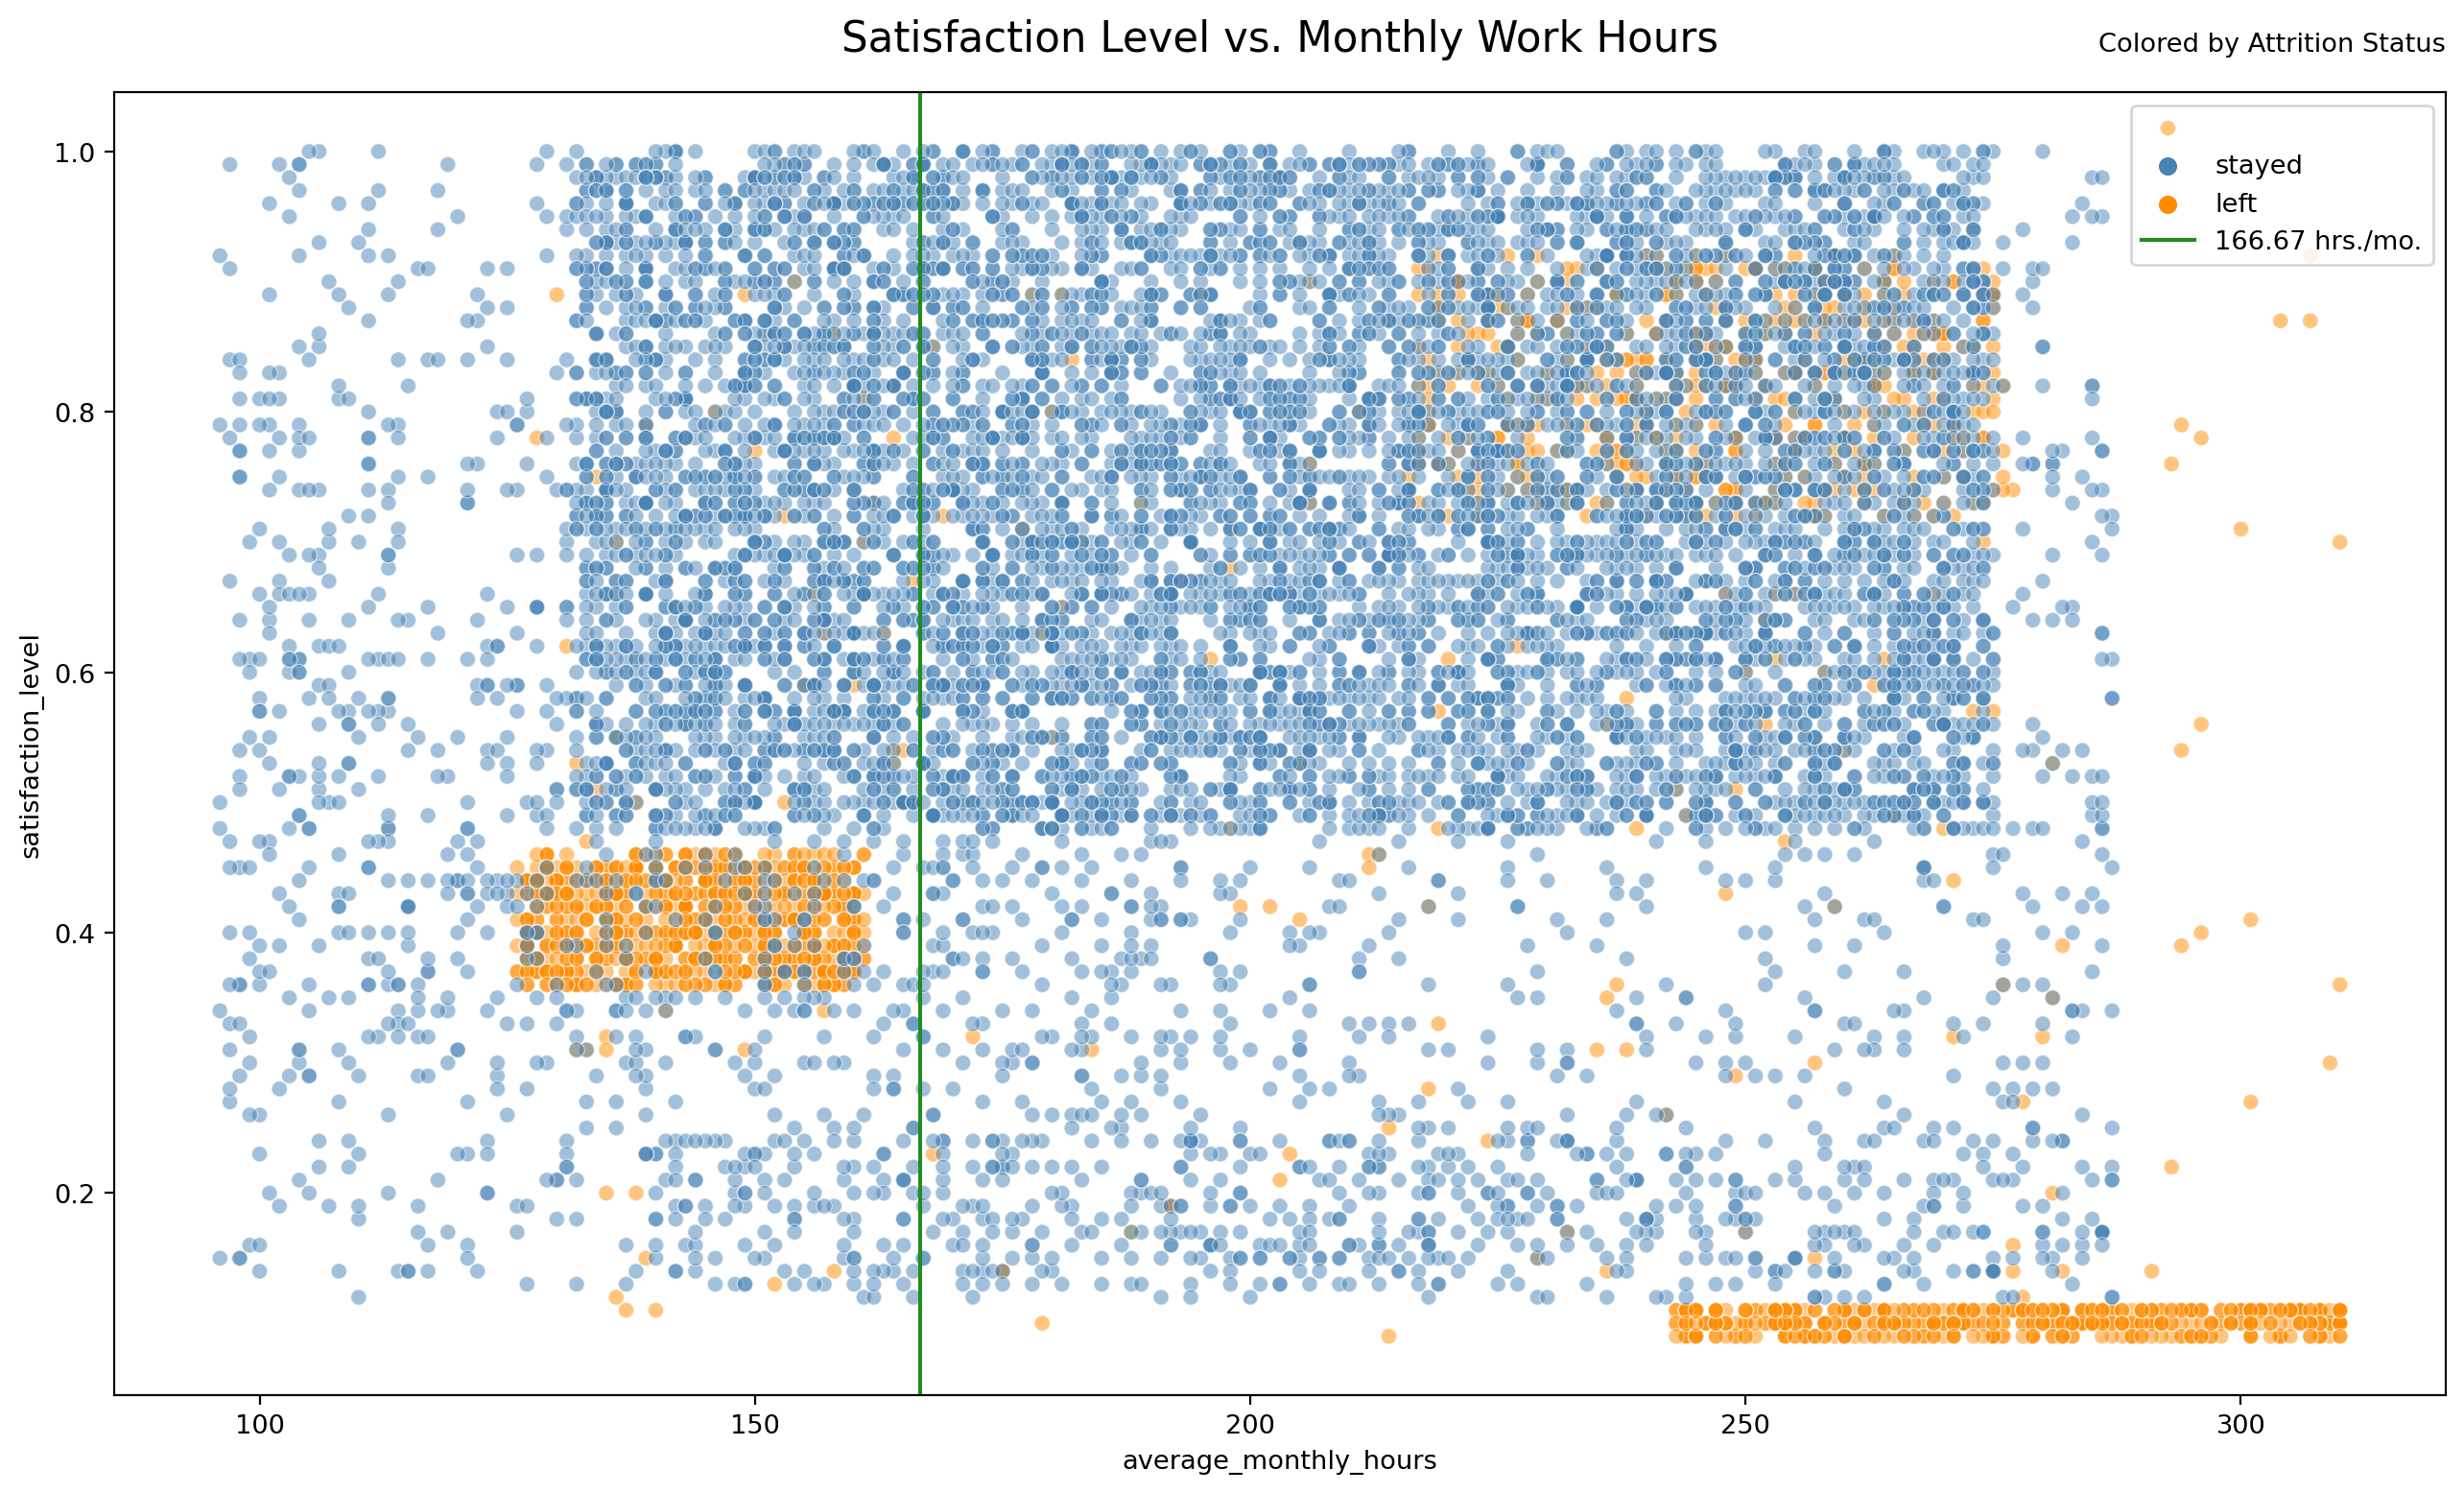

In [88]:
# Scatterplot showing Satisfaction level over Monthly work hours,
fig = plt.figure(figsize=(16,9), dpi=196)
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left',
                palette=['steelblue','darkorange'],
                alpha=0.5)
plt.axvline(x=166.67, color='forestgreen', label='normal monthly work hours')
plt.legend(labels=['', 'stayed', 'left','166.67 hrs./mo.'])
plt.title('Satisfaction Level vs. Monthly Work Hours', fontsize=16)
plt.title('Colored by Attrition Status', fontsize=10, loc='right', pad=16)
# Display and save the plots
plt.show()
fig.savefig('EDA/satisfication-workHrs.png')
plt.close()

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data.

---
This conclution provided by exemplar

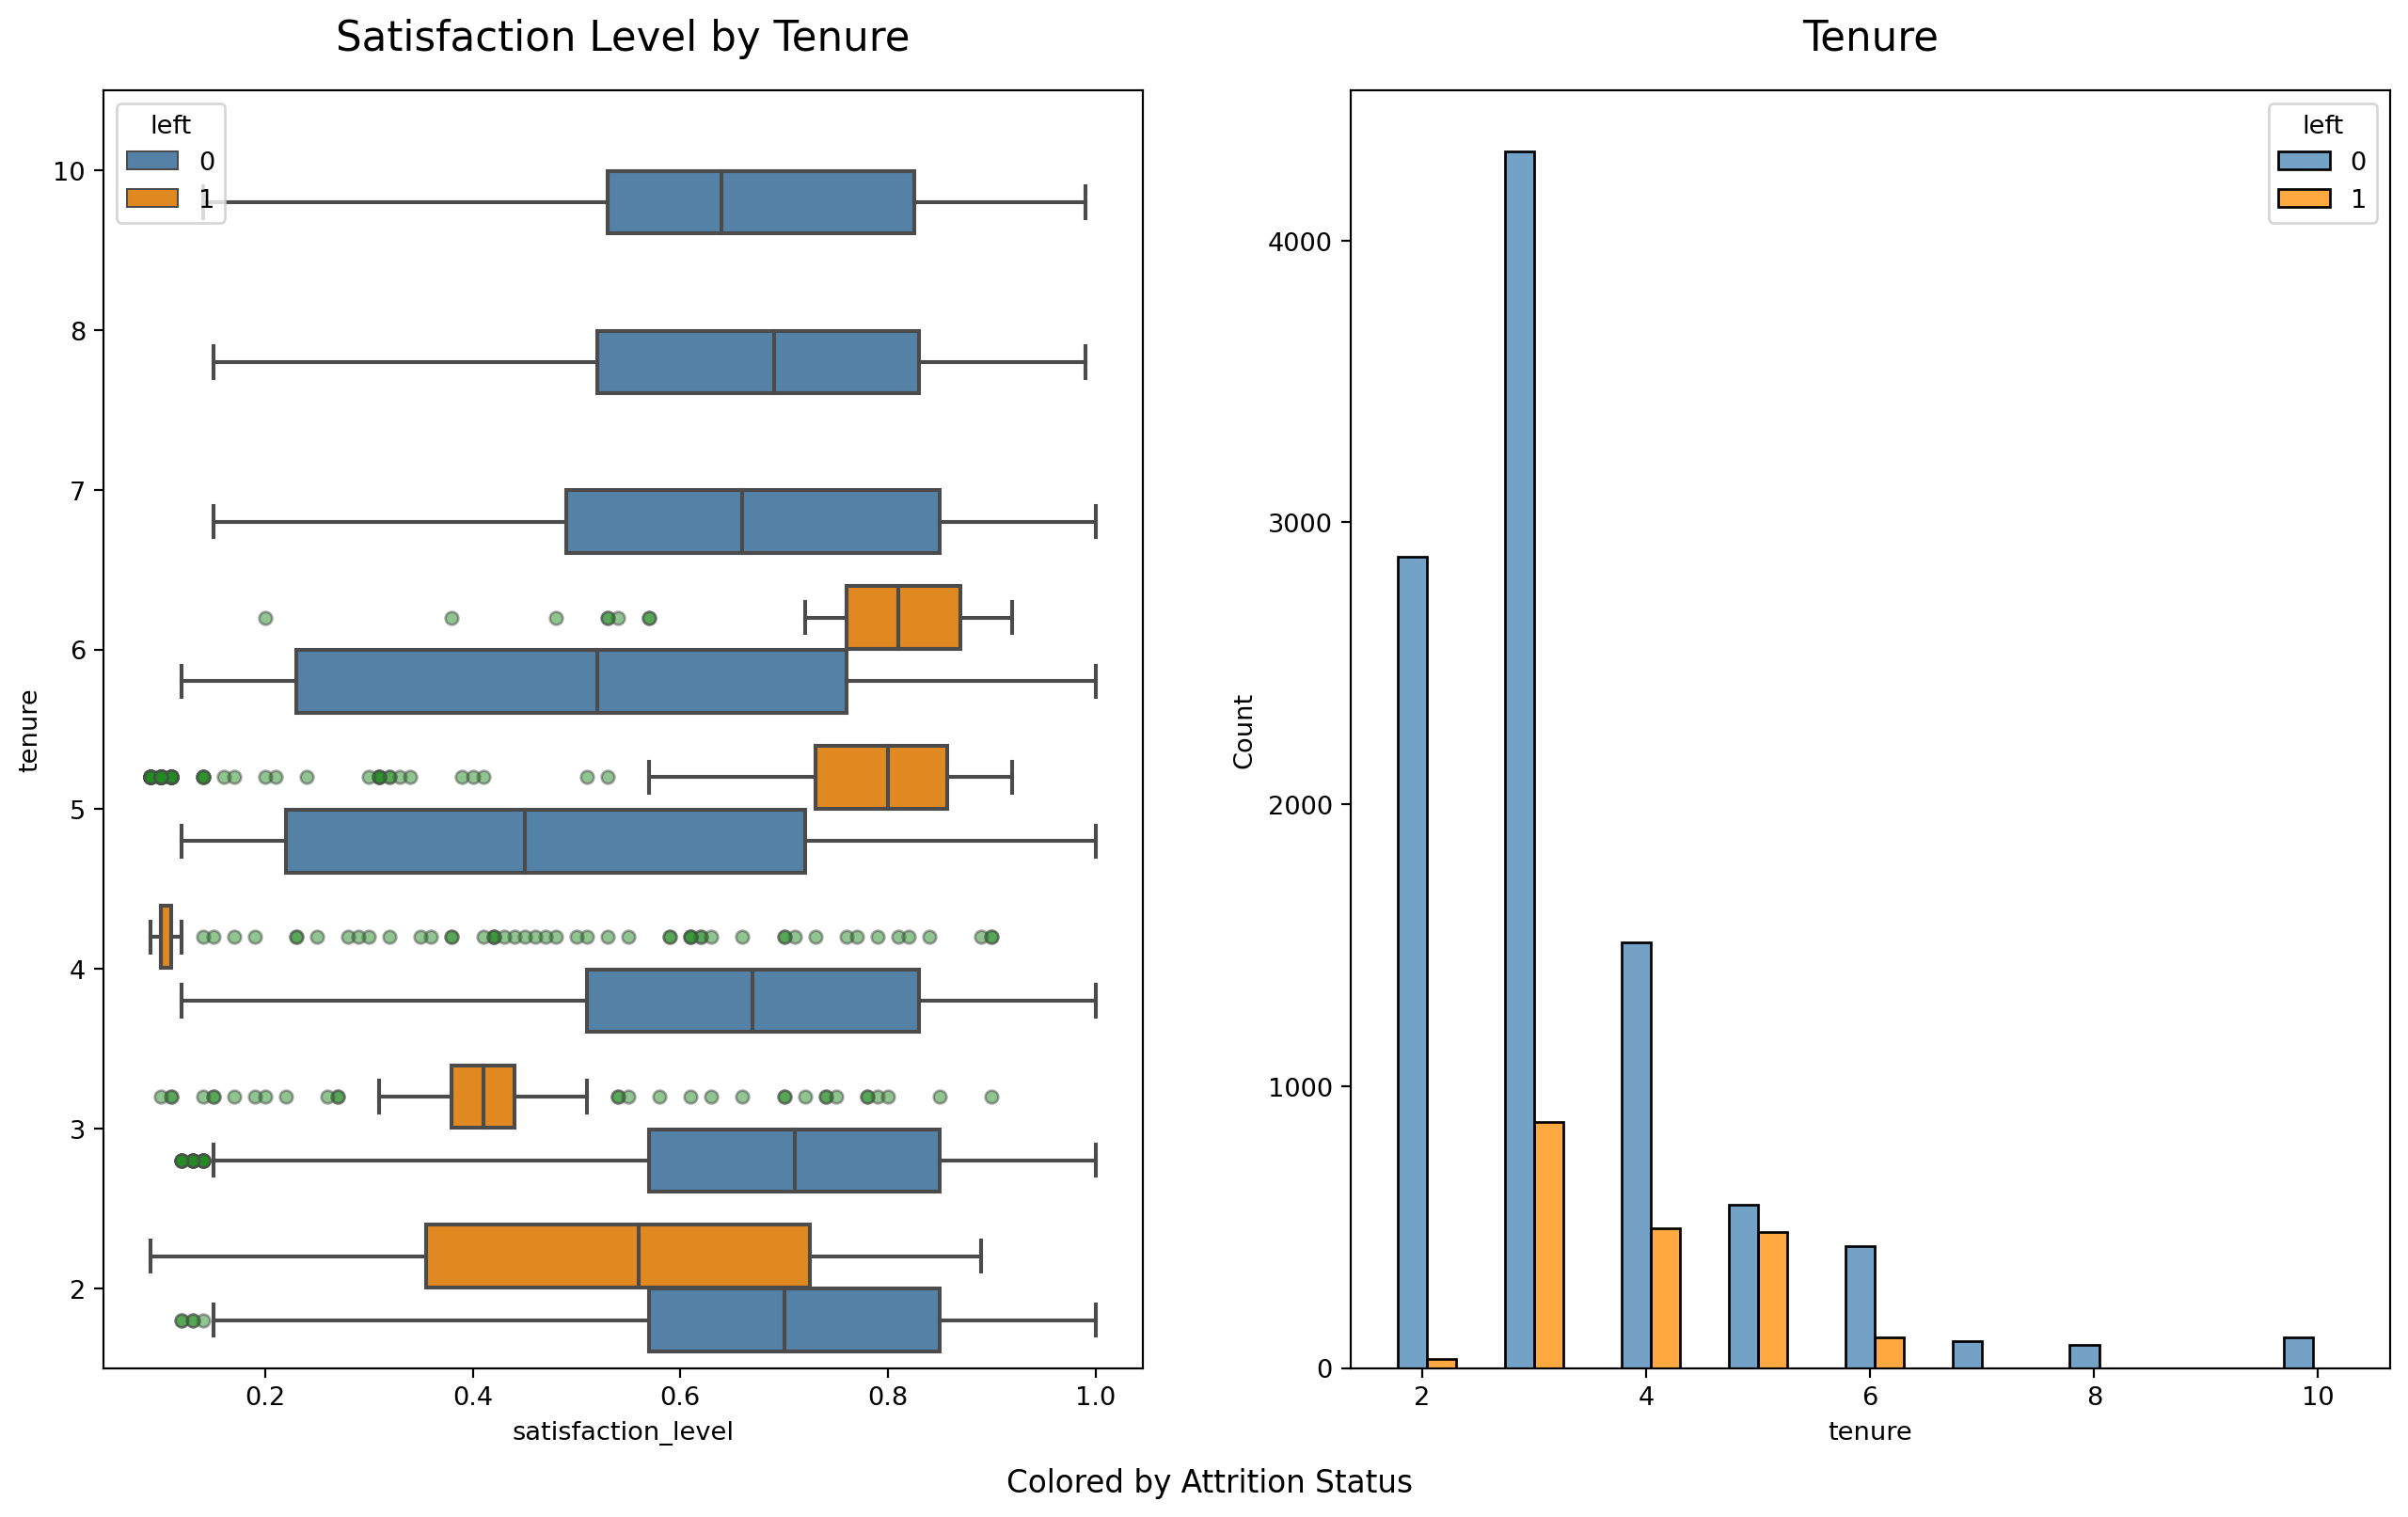

In [89]:
fig, axes = plt.subplots(1,2, figsize=(16,9), dpi=196)

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', 
            hue='left', orient='h',
            flierprops=dict(marker='o', 
                            markerfacecolor='forestgreen',
                            linewidth=0,alpha=0.5),
            palette=['steelblue','darkorange'],
            ax=axes[0]) # layout location

axes[0].legend(title='left', loc='upper left')
axes[0].invert_yaxis()
axes[0].set_title('Satisfaction Level by Tenure',
                  fontsize=16, pad=16)

# Histogram showing satisfaction level of employees left vs stayed
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge',
             shrink=6, label=y_val,
             palette=['steelblue','darkorange'],
             ax=axes[1]) # layout location
axes[1].set_title('Tenure',
                  fontsize=16, pad=16)

# subtitle for color
fig.suptitle('Colored by Attrition Status',y=0.05)

# Display and save the plots
plt.show()
fig.savefig('EDA/satisfaction-tenure-left.png')
plt.close()

There are many observations you could make from this plot.

* Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
* Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.
* The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
* The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

---
This conclution provided by exemplar

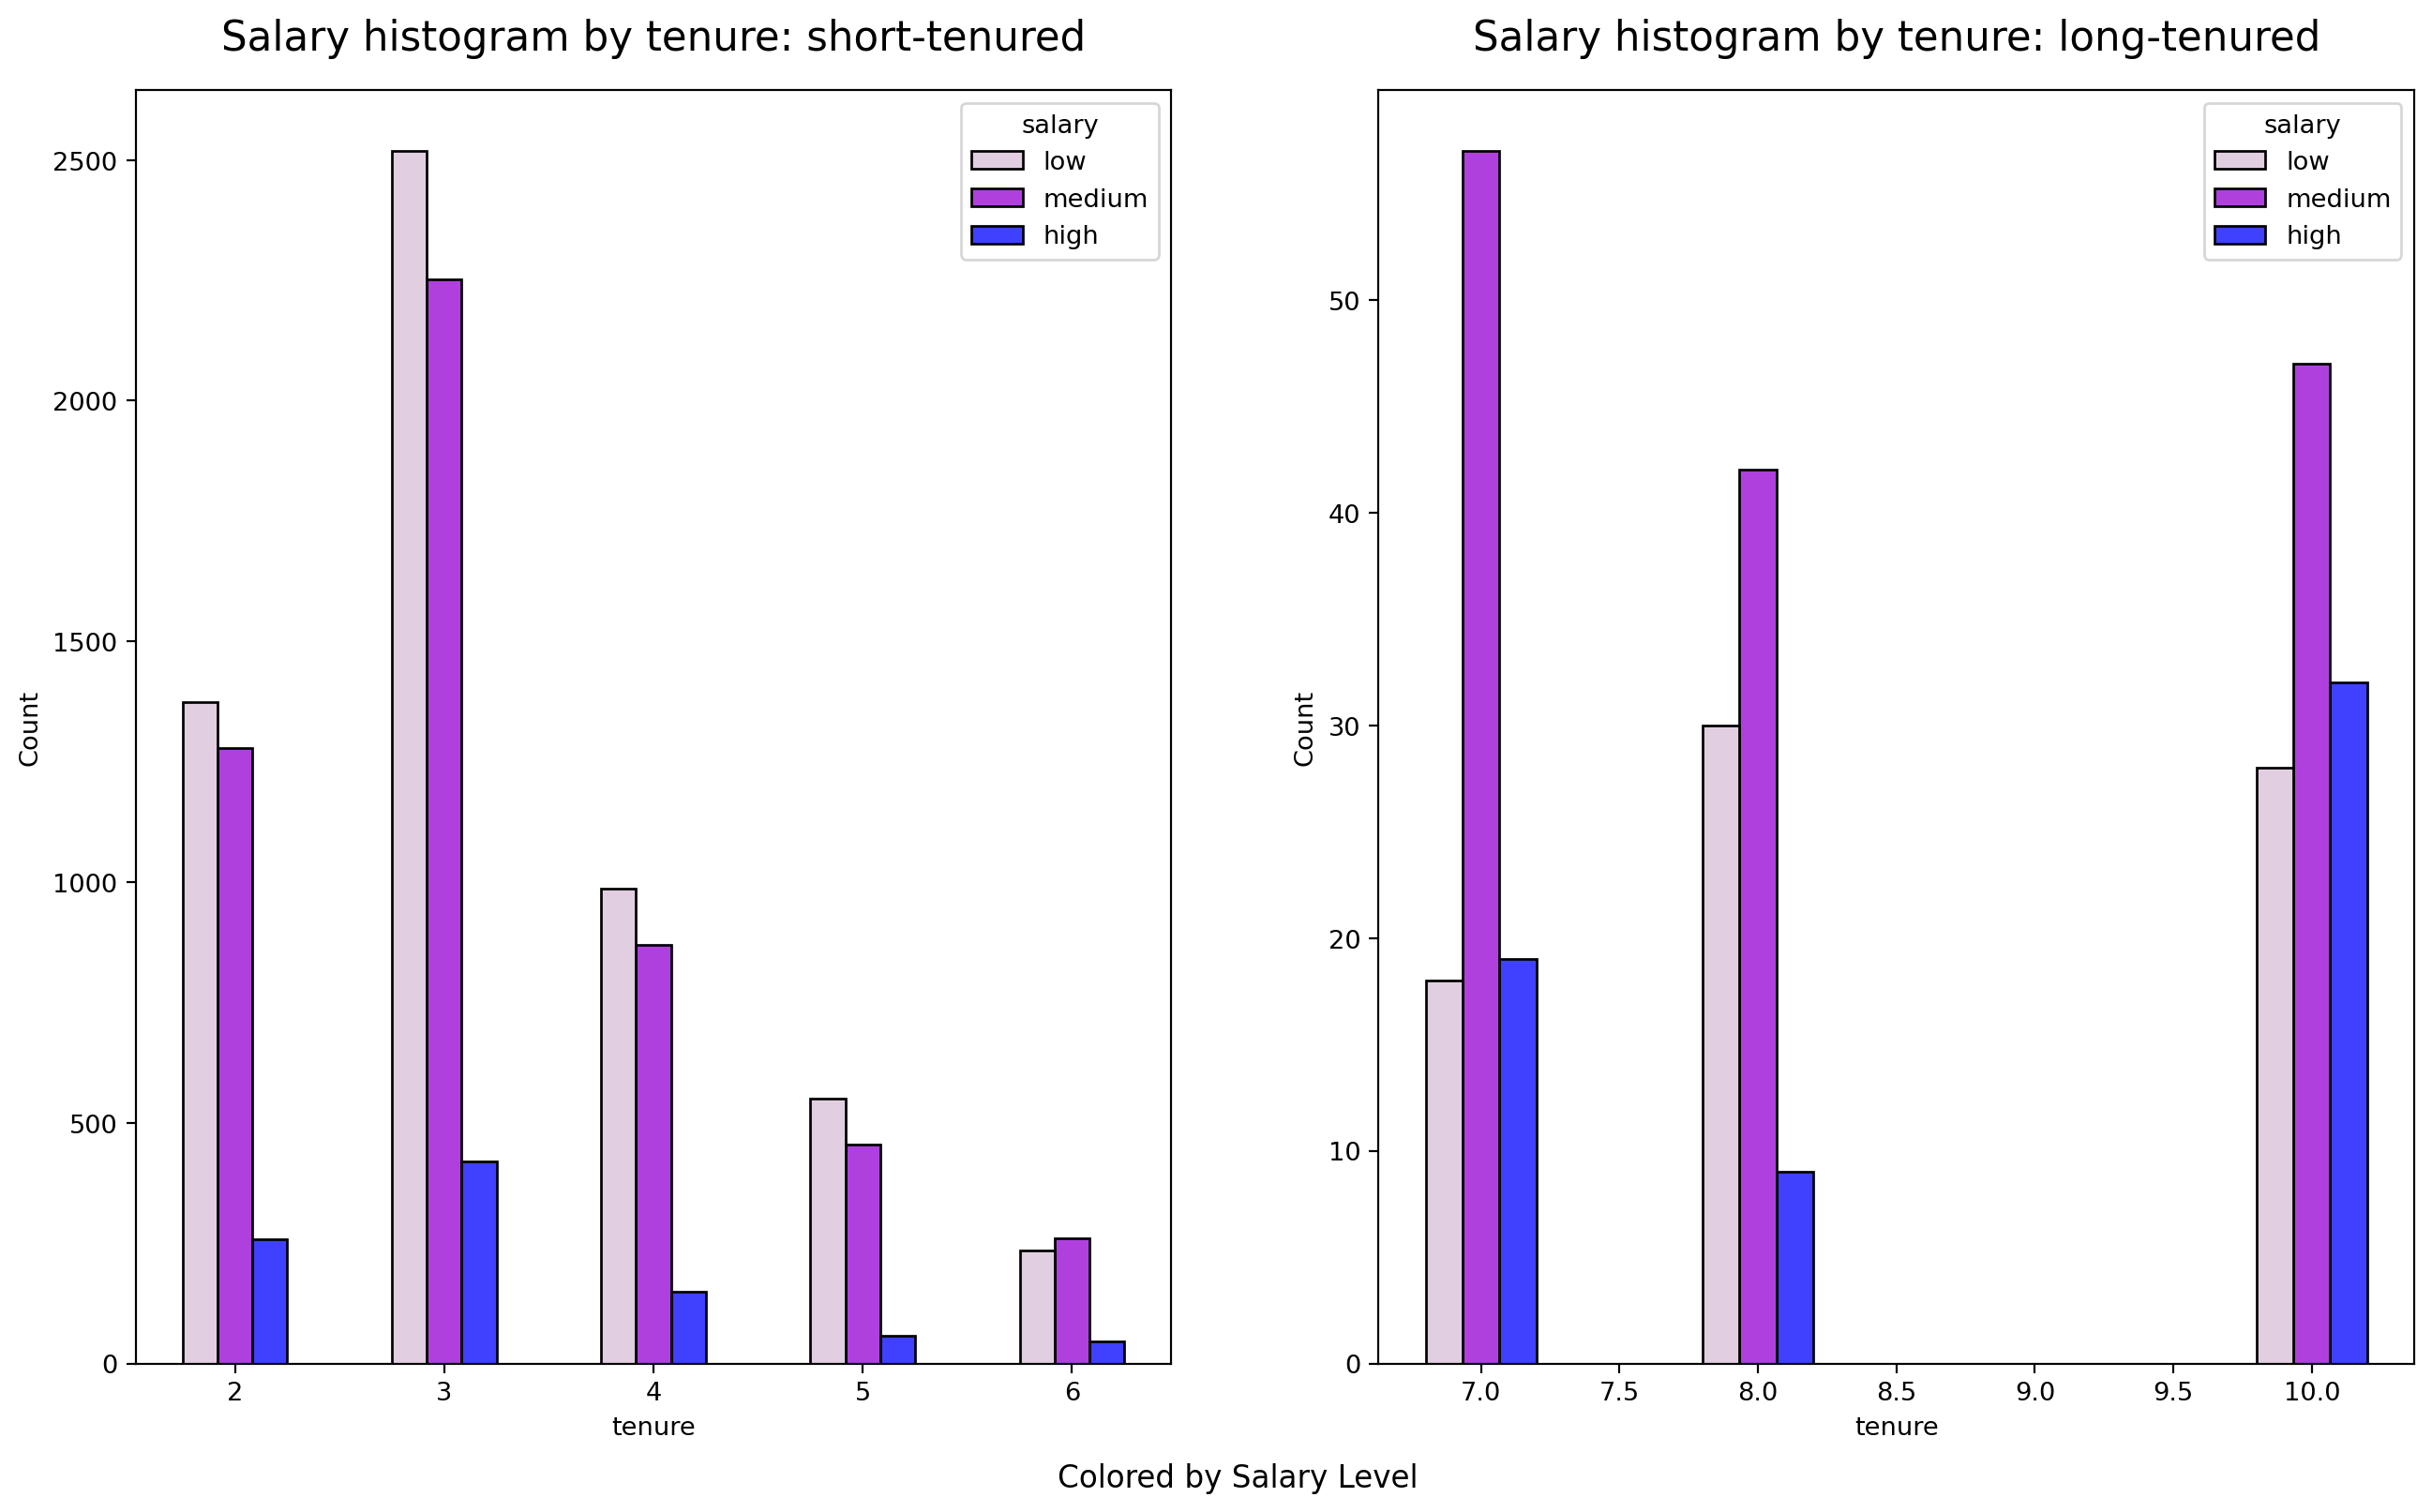

In [90]:
# Set figure and axes
fig, ax = plt.subplots(1,2, figsize=(16,9), dpi=196)

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', 
             hue='salary', discrete=1, hue_order=['low', 'medium', 'high'], 
             multiple='dodge', shrink=.5, 
             palette=['thistle','darkviolet','blue'],
             ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured', 
                fontsize=16, pad=16)

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', 
             hue='salary', discrete=1, hue_order=['low', 'medium', 'high'], 
             multiple='dodge', shrink=.4, 
             palette=['thistle','darkviolet','blue'],
             ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured', 
                fontsize=16, pad=16);

# subtitle for color
fig.suptitle('Colored by Salary Level',y=0.05)

# Display and save the plots
plt.show()
fig.savefig('EDA/tenure-salary.png')
plt.close()

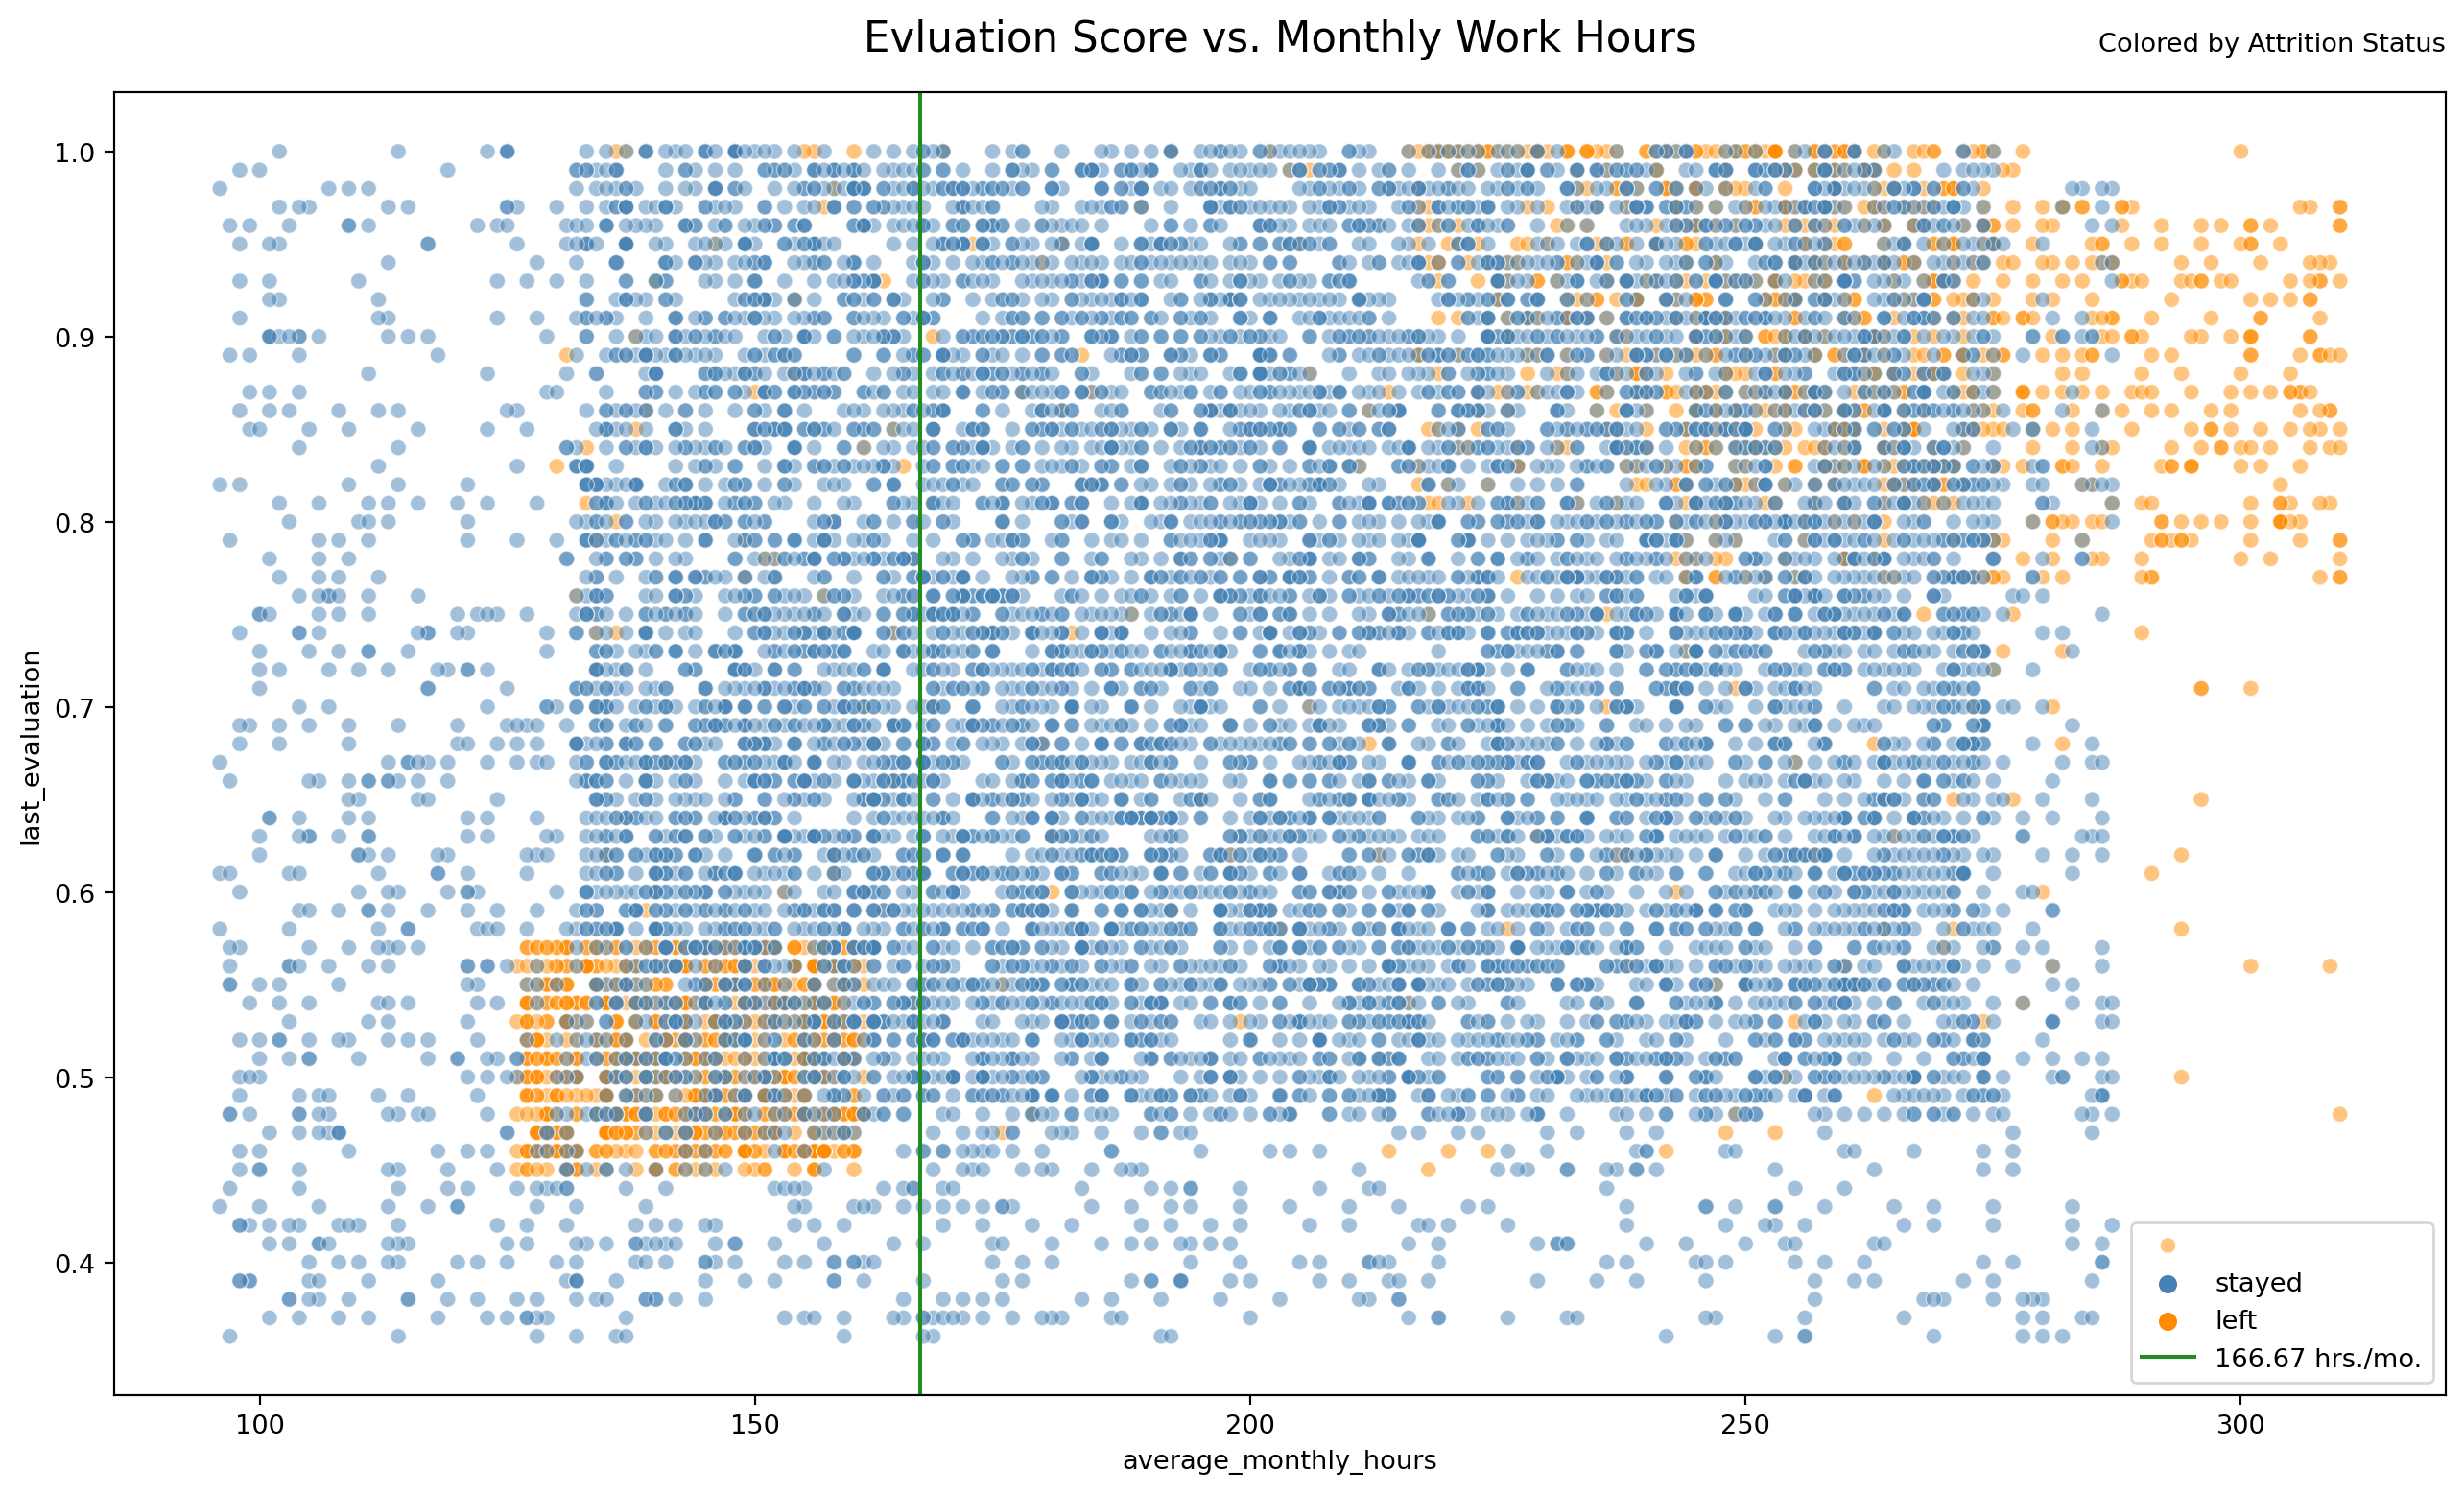

In [91]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
fig = plt.figure(figsize=(16,9), dpi=196)
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left',
                palette=['steelblue','darkorange'],
                alpha=0.5)
plt.axvline(x=166.67, color='forestgreen', label='normal monthly work hours')
plt.legend(labels=['', 'stayed', 'left','166.67 hrs./mo.'])
plt.title('Evluation Score vs. Monthly Work Hours', fontsize=16)
plt.title('Colored by Attrition Status', fontsize=10, loc='right', pad=16)

# Display and save the plots
plt.show()
fig.savefig('EDA/evaluation-workHrs.png')
plt.close()

The following observations can be made from the scatterplot above:

* The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.
* There seems to be a correlation between hours worked and evaluation score.
* There isn't a high p* ercentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.

---
This conclution provided by exemplar

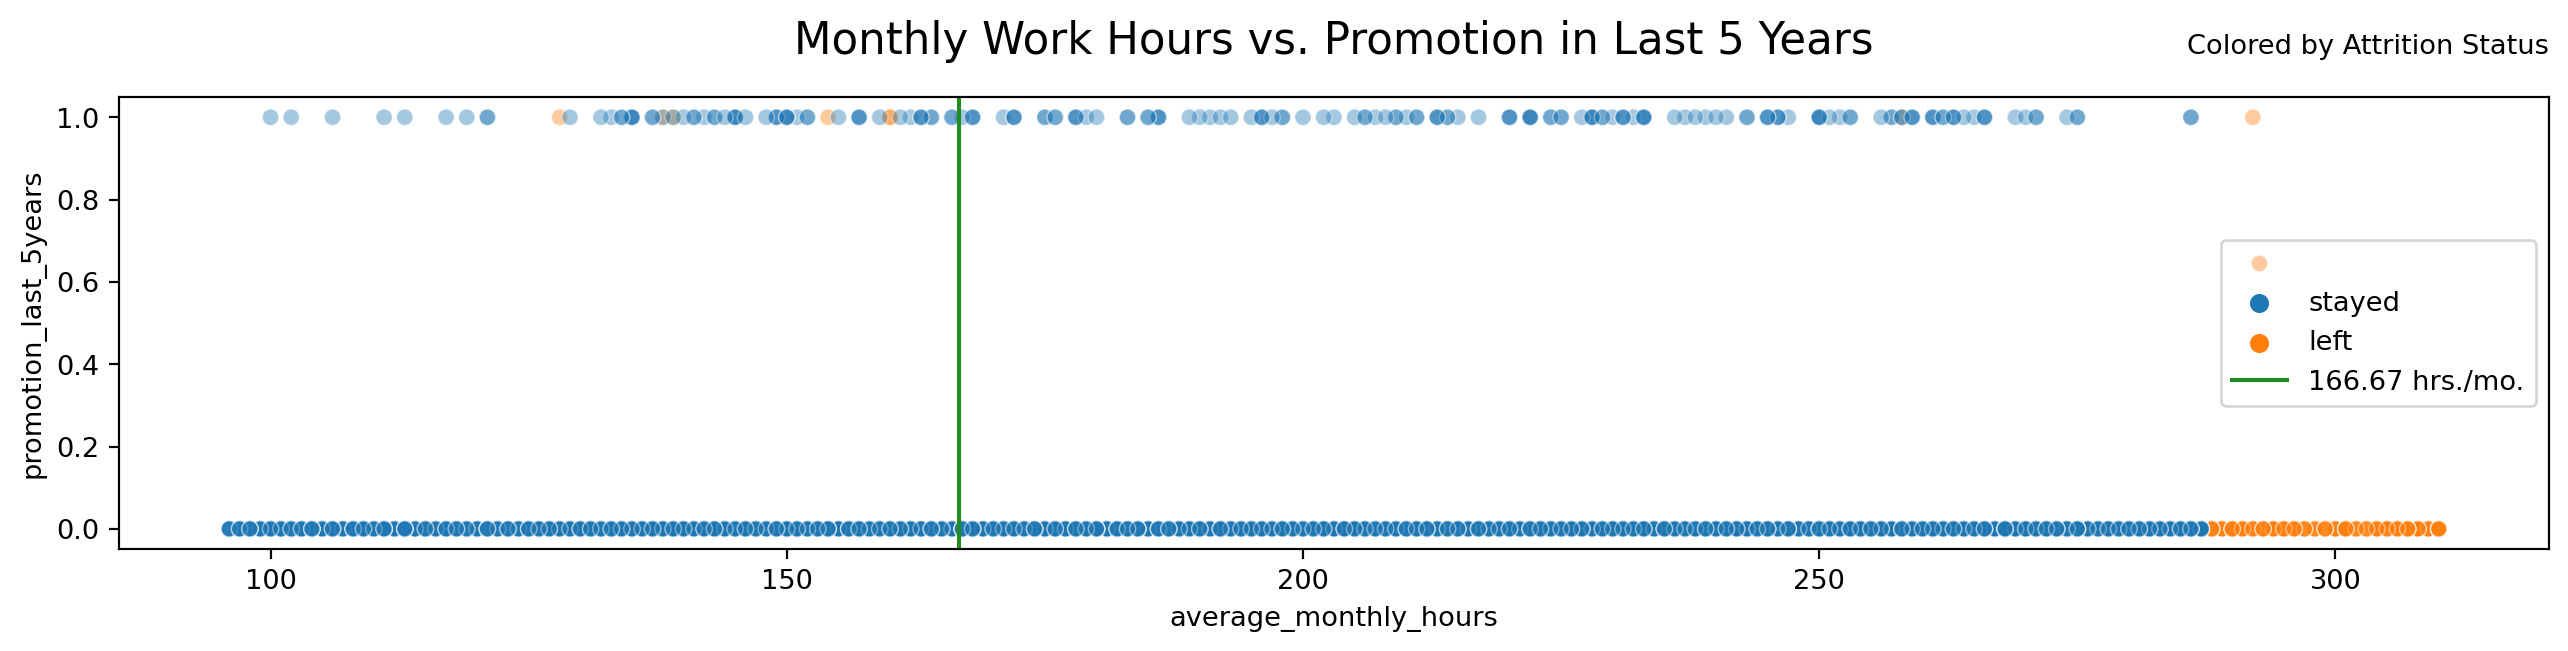

In [92]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
fig = plt.figure(figsize=(16, 3), dpi=196)
size = df1['number_project']*100
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years',
                hue='left', sizes=30, alpha=0.4)
plt.axvline(x=166.67, color='forestgreen')
plt.legend(labels=['', 'stayed', 'left','166.67 hrs./mo.'])
plt.title('Monthly Work Hours vs. Promotion in Last 5 Years', fontsize=16)
plt.title('Colored by Attrition Status', fontsize=10, loc='right', pad=16)

# Display and save the plots
plt.show()
fig.savefig('EDA/promotion-workHrs.png')
plt.close()

---
The plot above shows the following:

* very few employees who were promoted in the last five years left
* very few employees who worked the most hours were promoted
* all of the employees who were working over about 280 hours left

---

---
The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether employees left is negatively correlated with their satisfaction level.

---

### Insights
It appears that employees are leaving the company as a result of longer working hours, too many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. 

It also appears that if an employee has spent more than six years at the company, they tend not to leave.

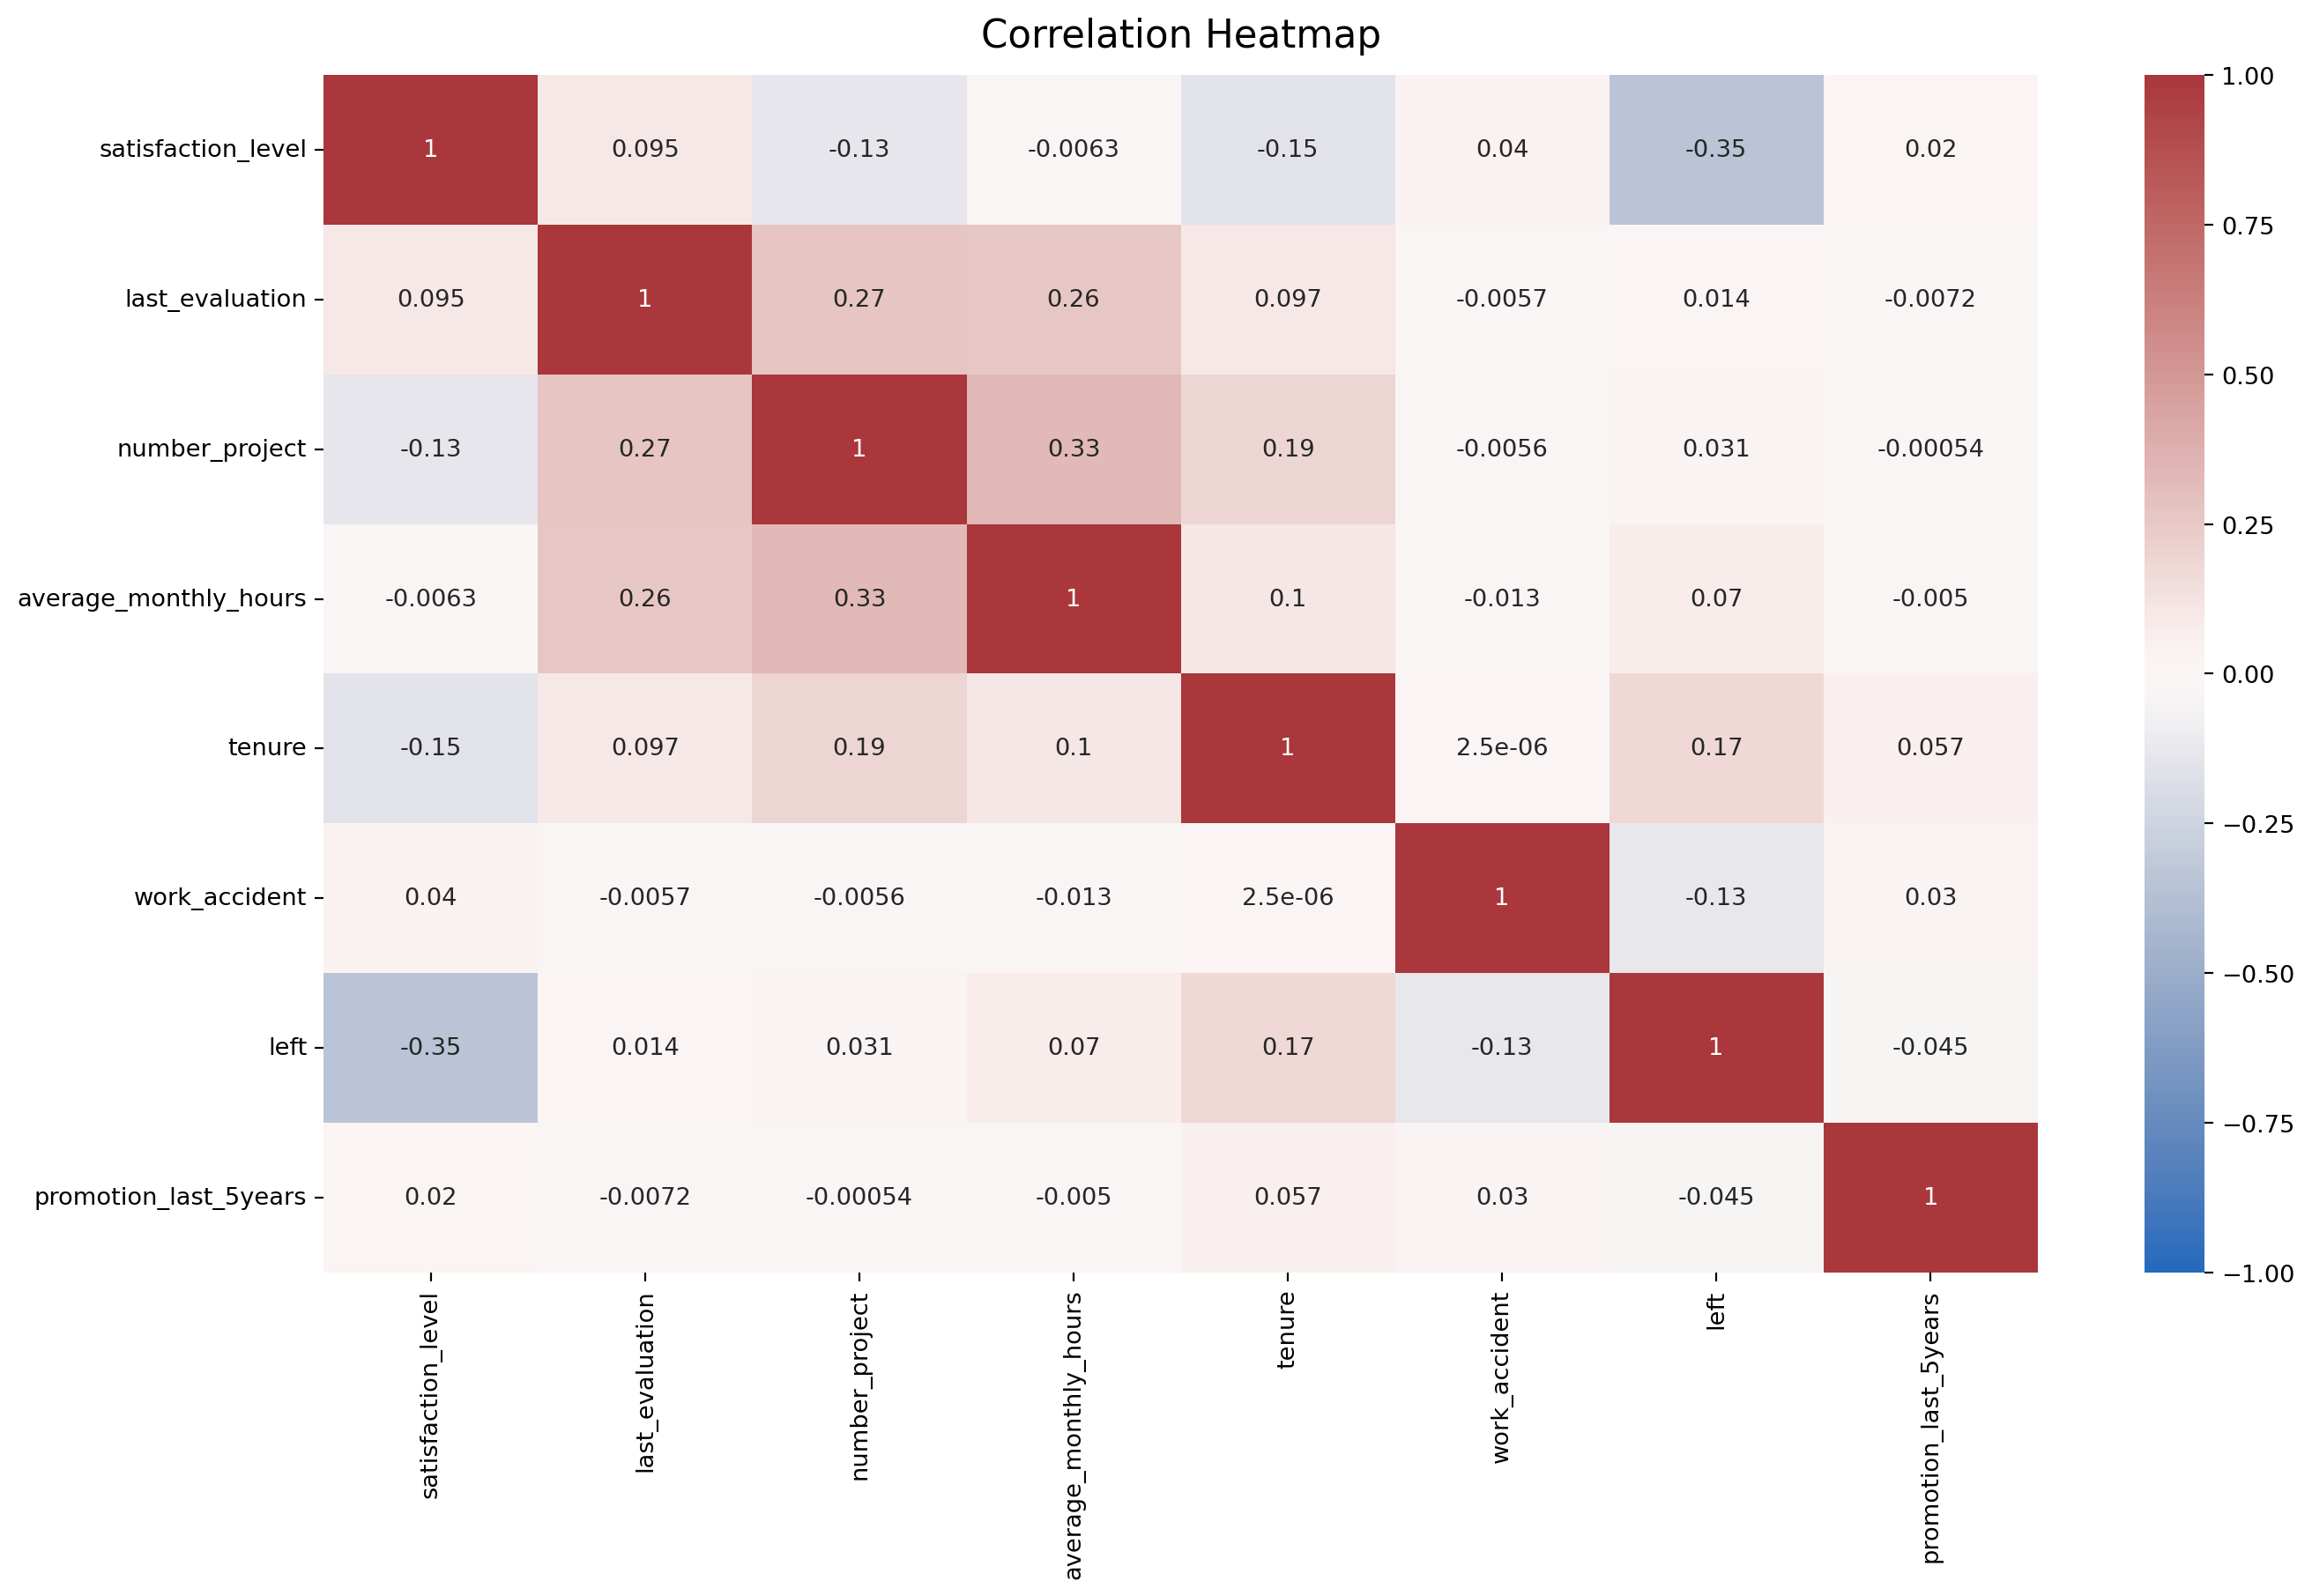

In [93]:
# Plot a correlation heatmap(run after encoding)
fig = plt.figure(figsize=(16,9), dpi=196)
heatmap = sns.heatmap(df1[['satisfaction_level', 'last_evaluation', 'number_project',
                           'average_monthly_hours', 'tenure', 'work_accident', 'left',
                           'promotion_last_5years']].corr(),
                      vmin=-1, vmax=1, annot=True, 
                      cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12)

# Display and save the plots
plt.show()
fig.savefig('EDA/heatmap.png')
plt.close()

# **<font color=#ffbc32>Construct</font> Stage**
The goal is to predict whether an employee will leave the company, which is a categorical outcome variable. Therefore, this task involves a classification problem — more specifically, a binary classification.
It would be appropriate to either build a Logistic Regression model or use a tree-based machine learning model.

Define functions to pickle the model and read back/in them later.

In [94]:
# Define a path to the folder where you want to save the model
chose = '/kaggle/working/model/'
temp = '/kaggle/working/temp/'

# Define pickle function
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

# Define read back function
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

## Step 3. Model Building, Step 4. Results and Evaluation
Before splitting the data, it is necessary to encode the non-numeric variables. There are two: `department` and `salary`.

`Department` is a categorical variable, which can be encoded using dummy variables for modeling purposes.

`Salary` is also categorical, but it is ordinal — meaning there is an inherent hierarchy among the categories. Therefore, it is better not to dummy this column, but instead to map the levels to numerical values (e.g., 0–2).

In [95]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       average_monthly_hours  tenure  work_accident  left  \
0                        157       3              0     1   
1                        262       6              0     1   
2                        272       4              0     1   
3                        223       5              0     1   
4                        159       3              0     1   
...                      ...     ...            ...   ...   
11995                    259      10              1     0   
11996                    266      10              0     0   
11997                    185      10              0     0   
11998                    172      10              0     0   
11999                    180       3              0     0   

       promotion_last_5years  salary  department_IT  department_RandD  \
0                          0       0          False             False   
1                          0       1          False             False   
2                          0       1          False             False   
3                          0       0          False             False   
4                          0       0          False             False   
...                      ...     ...            ...               ...   
11995                      1       2          False             False   
11996                      1       2          False             False   
11997                      1       2          False             False   
11998                      1       2          False             False   
11999                      0       0           True             False   

       department_accounting  department_hr  department_management  \
0                      False          False                  False   
1                      False          False                  False   
2                      False          False                  False   
3                      False          False                  False   
4                      False          False                  False   
...                      ...            ...                    ...   
11995                  False          False                   True   
11996                  False          False                   True   
11997                  False          False                   True   
11998                  False          False                  False   
11999                  False          False                  False   

       department_marketing  department_product_mng  department_sales  \
0                     False                   False              True   
1                     False                   False              True   
2                     False                   False              True   
3                     False                   False              True   
4                     False                   False              True   
...                     ...                     ...               ...   
11995                 False                   False             False   
11996                 False                   False             False   
11997                 False                   False             False   
11998                  True                   False             False   
11999   

### Modeling Approach A: Logistic Regression Model
Logistic Regression model assumptions

* Outcome variable is categorical
* Observations are independent of each other
* No severe multicollinearity among X variables
* No extreme outliers
* Linear relationship between each X variable and the logit of the outcome variable
* Sufficiently large sample size

Create a heatmap to visualize how correlated X variables are. 

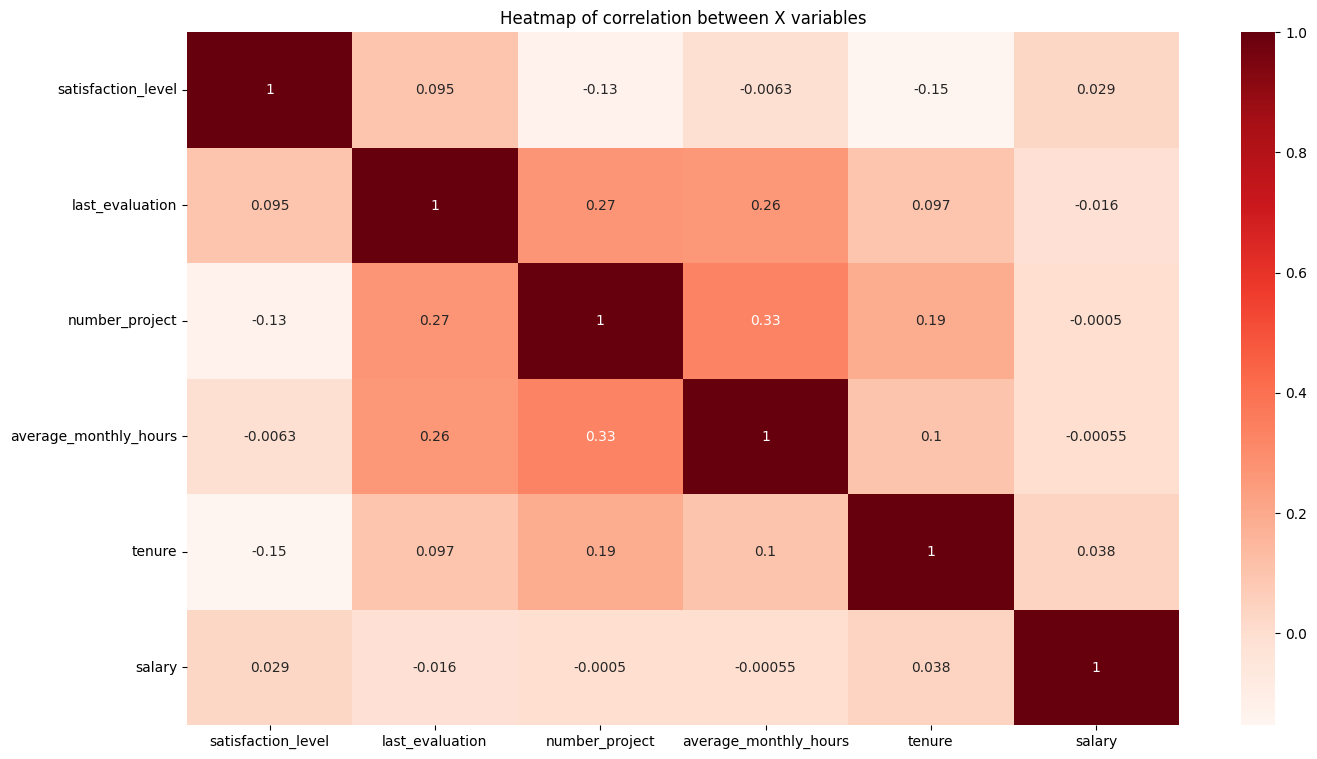

In [96]:
# Create a heatmap to visualize how correlated X variables are
fig = plt.figure(figsize=(16, 9))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 
                    'number_project', 'average_monthly_hours', 
                    'tenure', 'salary']]
            .corr(), annot=True, cmap="Reds")
plt.title('Heatmap of correlation between X variables')

# Display and save the plots
plt.show()
fig.savefig('evaluation/heatmap.png')
plt.close()

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the tenure column that were identified earlier.

In [97]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
5                    0.41             0.50               2   
...                   ...              ...             ...   
11985                0.72             0.64               4   
11986                0.48             0.50               5   
11987                0.19             0.79               4   
11992                0.62             0.85               3   
11999                0.50             0.73               4   

       average_monthly_hours  tenure  work_accident  left  \
0                        157       3              0     1   
2                        272       4              0     1   
3                        223       5              0     1   
4                        159       3              0     1   
5                        153       3              0     1   
...                      ...     ...            ...   ...   
11985                    192       3              0     0   
11986                    142       4              0     0   
11987                    229       4              0     0   
11992                    237       3              1     0   
11999                    180       3              0     0   

       promotion_last_5years  salary  department_IT  department_RandD  \
0                          0       0          False             False   
2                          0       1          False             False   
3                          0       0          False             False   
4                          0       0          False             False   
5                          0       0          False             False   
...                      ...     ...            ...               ...   
11985                      0       1          False             False   
11986                      0       1           True             False   
11987                      0       1          False             False   
11992                      0       1           True             False   
11999                      0       0           True             False   

       department_accounting  department_hr  department_management  \
0                      False          False                  False   
2                      False          False                  False   
3                      False          False                  False   
4                      False          False                  False   
5                      False          False                  False   
...                      ...            ...                    ...   
11985                  False          False                  False   
11986                  False          False                  False   
11987                  False          False                  False   
11992                  False          False                  False   
11999                  False          False                  False   

       department_marketing  department_product_mng  department_sales  \
0                     False                   False              True   
2                     False                   False              True   
3                     False                   False              True   
4                     False                   False              True   
5                     False                   False              True   
...                     ...                     ...               ...   
11985                 False                   False              True   
11986                 False                   False             False   
11987                 False                    True             False   
11992                 False                   False             False   
11999   

Isolate y and X variables and split the data into training set and testing set.

In [98]:
# Isolate the outcome variable
y = df_logreg['left']
# Select the features used in regression model
X = df_logreg.drop('left', axis=1)
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size=0.25, stratify=y, random_state=161)

Construct a logistic regression model and fit it to the training dataset.

In [99]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=161, 
          max_iter=500).fit(X_train, y_train)

# Pickle the model
write_pickle(chose, log_clf, 'logreg_clf')

Test the logistic regression model, make predictions on the test set.

In [100]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

Create a confusion matrix to visualize the results of the logistic regression model.

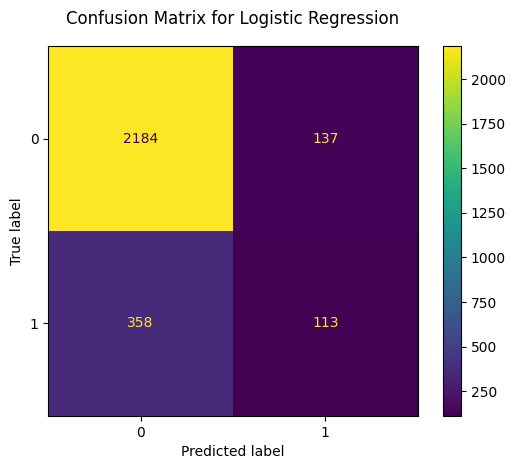

In [101]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

plt.title('Confusion Matrix for Logistic Regression',pad=16)

# Display and save the plots
plt.show()
fig.savefig('evaluation/cm-logRegression.png')
plt.close()

In [102]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2321
    Predicted would leave       0.45      0.24      0.31       471

                 accuracy                           0.82      2792
                macro avg       0.66      0.59      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



In [103]:
# Add auc score to test report
y_pred_proba = log_clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print('ROC-AUC score ', auc)

ROC-AUC score  0.8857299410624492


---
The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

---

In [104]:
# Create a test result table
log_test_score = pd.DataFrame({'model':['LogReg clf test'],
                           'precision':['0.79'],
                           'recall':['0.82'],
                           'F1':['0.8'],
                           'accuracy':['0.82'],
                           'auc':['0.8857']})

# View the table
log_test_score

model precision recall   F1 accuracy     auc
0  LogReg clf test      0.79   0.82  0.8     0.82  0.8857

### Modeling Approach B: Tree-based Model

a function that will help to extract all the scores from the grid search

In [105]:
def model_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

Isolate y and X variables and split the data into training set and testing set.

In [106]:
# Isolate the outcome variable
y = df_enc['left']
# Select the features used in regression model
X = df_enc.drop('left', axis=1)
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size=0.25, stratify=y, random_state=161)

#### Decision tree - Round 1
Construct a decision tree model and set up cross-validated grid-search

In [107]:
# Instantiate the classifier
dt = DecisionTreeClassifier(random_state = 161)

# Assign a set of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [108]:
# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4,8,12,20,40,50, None],
             'min_samples_leaf': [2, 5, 10, 20, 50],
             'min_samples_split': [2, 4, 8]}

# Instantiate the GridSearch
dt1 = GridSearchCV(dt, cv_params, scoring = scoring,
                     cv=5, refit='roc_auc')

In [109]:
%%time
# Fit the model
dt1.fit(X_train, y_train)
write_pickle(temp, dt1, 'dt1_cv')

CPU times: user 17.1 s, sys: 7 ms, total: 17.1 s
Wall time: 17.1 s


In [110]:
# Check best parameters
dt1.best_params_

{'max_depth': 20, 'min_samples_leaf': 50, 'min_samples_split': 2}

In [111]:
# Get all CV scores
dt1_cv_results = model_results('dt1 cv', dt1, 'auc')
dt1_cv_results

model  precision    recall       F1  accuracy       auc
0  dt1 cv   0.924255  0.886131  0.90466  0.968976  0.972039

Ajust the hyper-parameters and re-model

In [112]:
%%time
# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[16, 18, 20, 22],
             'min_samples_leaf': [30, 40, 50, 60],
             'min_samples_split': [2]}

# Instantiate the GridSearch
dt2 = GridSearchCV(dt, cv_params, scoring = scoring,
                     cv=5, refit='roc_auc')

# Fit the model
dt2.fit(X_train, y_train)
write_pickle(temp, dt2, 'dt2_cv')

CPU times: user 2.6 s, sys: 6 ms, total: 2.61 s
Wall time: 2.61 s


In [113]:
# Check best parameters
dt2.best_params_

{'max_depth': 16, 'min_samples_leaf': 40, 'min_samples_split': 2}

In [114]:
# Get all CV scores
dt2_cv_results = model_results('dt2 cv', dt2, 'auc')
results = pd.concat([dt1_cv_results, dt2_cv_results])
results

model  precision    recall        F1  accuracy       auc
0  dt1 cv   0.924255  0.886131  0.904660  0.968976  0.972039
0  dt2 cv   0.938336  0.883446  0.909988  0.970978  0.972239

#### Random forest - Round 1
Construct a radom forest model and set up cross-validated grid-search

In [115]:
# Instantiate the classifier
rf = RandomForestClassifier(random_state = 161)

# Assign a set of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [116]:
# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [2,5, None], 
             'max_features': [0.2,0.8],
             'min_samples_leaf': [1,3],
             'min_samples_split': [2,4],
             'n_estimators': [75, 125, 150]
             }  
# Instantiate the GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring = scoring,
                     cv=5, refit='roc_auc')

In [117]:
%%time
# Fit the model
rf1.fit(X_train, y_train)
write_pickle(temp, rf1, 'rf1_cv')

CPU times: user 4min 19s, sys: 361 ms, total: 4min 19s
Wall time: 4min 20s


In [118]:
# Check best parameters
rf1.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 125}

In [119]:
# Get all CV scores
rf1_cv_results = model_results('rf1 cv', rf1, 'auc')
results = pd.concat([results,rf1_cv_results])
results

model  precision    recall        F1  accuracy       auc
0  dt1 cv   0.924255  0.886131  0.904660  0.968976  0.972039
0  dt2 cv   0.938336  0.883446  0.909988  0.970978  0.972239
0  rf1 cv   0.983207  0.901533  0.940568  0.981096  0.980721

Ajust the hyper-parameters and re-model

In [120]:
%%time
# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [12,14,16], 
             'max_features': [0.2,0.5,0.8],
             'min_samples_leaf': [8,9,10],
             'min_samples_split': [2],
             'n_estimators': [140,150,160]
             }  
# Instantiate the GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring = scoring,
                     cv=5, refit='roc_auc')

# Fit the model
rf2.fit(X_train, y_train)
write_pickle(temp, rf2, 'rf2_cv')

CPU times: user 8min 47s, sys: 614 ms, total: 8min 47s
Wall time: 8min 48s


In [121]:
# Check best parameters
rf2.best_params_

{'max_depth': 14,
 'max_features': 0.5,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'n_estimators': 150}

In [122]:
# Get all CV scores
rf2_cv_results = model_results('rf2 cv', rf2, 'auc')
results = pd.concat([results, rf2_cv_results])
results

model  precision    recall        F1  accuracy       auc
0  dt1 cv   0.924255  0.886131  0.904660  0.968976  0.972039
0  dt2 cv   0.938336  0.883446  0.909988  0.970978  0.972239
0  rf1 cv   0.983207  0.901533  0.940568  0.981096  0.980721
0  rf2 cv   0.971263  0.902204  0.935416  0.979317  0.982117

In [123]:
# Save the best tree model
tree_clf = rf2
write_pickle(chose, tree_clf, 'tree_clf')

Define a function that gets all the scores from a model's predictions.

In [124]:
def test_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name+' test'],
                          'precision': [precision], 
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })
  
    return table

Use the best performing model to predict on the test set.

In [125]:
# Get predictions on test data
tree_scores = test_scores('Tree clf', tree_clf, X_test, y_test)
results = pd.concat([log_test_score, results, tree_scores])

# Save table as csv
results.to_csv('evaluation/scores_table.csv')
# View the results
results

model precision    recall        F1  accuracy       auc
0  LogReg clf test      0.79      0.82       0.8      0.82    0.8857
0           dt1 cv  0.924255  0.886131   0.90466  0.968976  0.972039
0           dt2 cv  0.938336  0.883446  0.909988  0.970978  0.972239
0           rf1 cv  0.983207  0.901533  0.940568  0.981096  0.980721
0           rf2 cv  0.971263  0.902204  0.935416  0.979317  0.982117
0    Tree clf test  0.978723  0.923695  0.950413  0.983989  0.959847

Create a confusion matrix to visualize the results of the logistic regression model.

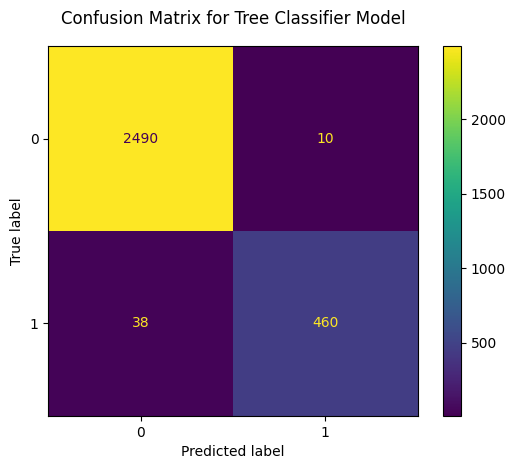

In [126]:
# Use the random forest model to get predictions on the test set
y_pred = tree_clf.predict(X_test)

# Compute values for confusion matrix
tree_cm = confusion_matrix(y_test, y_pred, labels=tree_clf.classes_)

# Create display of confusion matrix
tree_disp = ConfusionMatrixDisplay(confusion_matrix=tree_cm, 
                                  display_labels=tree_clf.classes_)

# Plot confusion matrix
tree_disp.plot(values_format='')

plt.title('Confusion Matrix for Tree Classifier Model',pad=16)

# Display and save the plots
plt.show()
fig.savefig('evaluation/cm-treeClassifier.png')
plt.close()

## Step Extra. Feature Engineering
In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the average_monthly_hours column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models.

It is better to drop `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. 

Since 166.75 is approximately the average number of monthly hours for someone working 50 weeks per year, 5 days per week, and 8 hours per day, it is reasonable to create a new feature, overworked, by flagging employees who work more than 175 hours per month.

The threshold of 175 hours was chosen to capture employees who are working significantly above the expected average, indicating potential overwork.

In [127]:
# drop `satisfaction_level`
df2 = df_enc.drop('satisfaction_level', axis=1)

# filter overworked `average_monthly_hours`>175
overworked = df2['average_monthly_hours']>175

# impute 1 for overworked and 0 for else
df2['overworked'] = overworked.astype(int) 

# drop `average_monthly_hours`
df2 = df2.drop('average_monthly_hours', axis=1)
df2

last_evaluation  number_project  tenure  work_accident  left  \
0                 0.53               2       3              0     1   
1                 0.86               5       6              0     1   
2                 0.88               7       4              0     1   
3                 0.87               5       5              0     1   
4                 0.52               2       3              0     1   
...                ...             ...     ...            ...   ...   
11995             0.55               3      10              1     0   
11996             0.95               5      10              0     0   
11997             0.54               3      10              0     0   
11998             0.65               3      10              0     0   
11999             0.73               4       3              0     0   

       promotion_last_5years  salary  department_IT  department_RandD  \
0                          0       0          False             False   
1                          0       1          False             False   
2                          0       1          False             False   
3                          0       0          False             False   
4                          0       0          False             False   
...                      ...     ...            ...               ...   
11995                      1       2          False             False   
11996                      1       2          False             False   
11997                      1       2          False             False   
11998                      1       2          False             False   
11999                      0       0           True             False   

       department_accounting  department_hr  department_management  \
0                      False          False                  False   
1                      False          False                  False   
2                      False          False                  False   
3                      False          False                  False   
4                      False          False                  False   
...                      ...            ...                    ...   
11995                  False          False                   True   
11996                  False          False                   True   
11997                  False          False                   True   
11998                  False          False                  False   
11999                  False          False                  False   

       department_marketing  department_product_mng  department_sales  \
0                     False                   False              True   
1                     False                   False              True   
2                     False                   False              True   
3                     False                   False              True   
4                     False                   False              True   
...                     ...                     ...               ...   
11995                 False                   False             False   
11996                 False                   False             False   
11997                 False                   False             False   
11998                  True                   False             False   
11999                 False                   False             False   

       department_support  department_technical  overworked  
0                   False                 False           0  
1                   False                 False           1  
2                   False                 False           1  
3                   False                 False           1  
4                   False                 False           0  
...                   ...                   ...         ...  
11995               False                 False           1  
11996               False                 False           1  
1

Again, isolate the features and target variables and split the data into training and testing sets.

In [128]:
# Isolate variable
y = df2['left']
X = df2.drop('left', axis=1)

# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                    test_size=0.25, stratify=y, random_state=161)

## Step Extra. Modeling and Evluation
#### Decision tree - Round 2

In [129]:
%%time
# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[9,10,11],
             'min_samples_leaf': [60, 70, 80],
             'min_samples_split': [2]}

# Instantiate the GridSearch
dt3 = GridSearchCV(dt, cv_params, scoring = scoring,
                     cv=5, refit='roc_auc')


# Fit the model
dt3.fit(X_train, y_train)
write_pickle(temp, dt3, 'dt3_cv')

CPU times: user 1.12 s, sys: 999 µs, total: 1.13 s
Wall time: 1.13 s


In [130]:
# Check best parameters
dt3.best_params_

{'max_depth': 10, 'min_samples_leaf': 70, 'min_samples_split': 2}

In [131]:
# Get all CV scores
dt3_cv_results = model_results('dt3 cv', dt3, 'auc')
results = pd.concat([results, dt3_cv_results])
results

model precision    recall        F1  accuracy       auc
0  LogReg clf test      0.79      0.82       0.8      0.82    0.8857
0           dt1 cv  0.924255  0.886131   0.90466  0.968976  0.972039
0           dt2 cv  0.938336  0.883446  0.909988  0.970978  0.972239
0           rf1 cv  0.983207  0.901533  0.940568  0.981096  0.980721
0           rf2 cv  0.971263  0.902204  0.935416  0.979317  0.982117
0    Tree clf test  0.978723  0.923695  0.950413  0.983989  0.959847
0           dt3 cv  0.822276  0.842603  0.832127  0.943623  0.959904

#### Random forest - Round 2

In [132]:
%%time
# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [9,10,11], 
             'max_features': [0.2,0.3,0.4],
             'min_samples_leaf': [10,12,14],
             'min_samples_split': [2],
             'n_estimators': [140]
             }  
# Instantiate the GridSearch
rf3 = GridSearchCV(rf, cv_params, scoring = scoring,
                     cv=5, refit='roc_auc')

# Fit the model
rf3.fit(X_train, y_train)
write_pickle(temp, rf3, 'rf3_cv')

CPU times: user 1min 30s, sys: 200 ms, total: 1min 30s
Wall time: 1min 30s


In [133]:
# Check best parameters
rf3.best_params_

{'max_depth': 9,
 'max_features': 0.4,
 'min_samples_leaf': 14,
 'min_samples_split': 2,
 'n_estimators': 140}

In [134]:
# Get all CV scores
rf3_cv_results = model_results('rf3 cv', rf3, 'auc')
results = pd.concat([results, rf3_cv_results])
results

model precision    recall        F1  accuracy       auc
0  LogReg clf test      0.79      0.82       0.8      0.82    0.8857
0           dt1 cv  0.924255  0.886131   0.90466  0.968976  0.972039
0           dt2 cv  0.938336  0.883446  0.909988  0.970978  0.972239
0           rf1 cv  0.983207  0.901533  0.940568  0.981096  0.980721
0           rf2 cv  0.971263  0.902204  0.935416  0.979317  0.982117
0    Tree clf test  0.978723  0.923695  0.950413  0.983989  0.959847
0           dt3 cv  0.822276  0.842603  0.832127  0.943623  0.959904
0           rf3 cv  0.908373   0.87407   0.89077  0.964417  0.968802

In [135]:
# Save the best tree model
tree_clf = rf3
write_pickle(chose, tree_clf, 'tree_clf_r2')

---
This model performs very well, even without satisfaction levels and detailed hours worked data.

The scores dropped slightly, that's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

The random forest performs better than the decision tree if using AUC as the deciding metric.

---

Use the best performing model to predict on the test set.

In [136]:
# Get predictions on test data
tree_scores = test_scores('Tree clf', tree_clf, X_test, y_test)
results = pd.concat([results, tree_scores])

# Save table as csv
results.to_csv('evaluation/scores_table.csv')
# View the results
results

model precision    recall        F1  accuracy       auc
0  LogReg clf test      0.79      0.82       0.8      0.82    0.8857
0           dt1 cv  0.924255  0.886131   0.90466  0.968976  0.972039
0           dt2 cv  0.938336  0.883446  0.909988  0.970978  0.972239
0           rf1 cv  0.983207  0.901533  0.940568  0.981096  0.980721
0           rf2 cv  0.971263  0.902204  0.935416  0.979317  0.982117
0    Tree clf test  0.978723  0.923695  0.950413  0.983989  0.959847
0           dt3 cv  0.822276  0.842603  0.832127  0.943623  0.959904
0           rf3 cv  0.908373   0.87407   0.89077  0.964417  0.968802
0    Tree clf test  0.915114   0.88755  0.901121  0.967645  0.935575

Create a confusion matrix to visualize the results of the logistic regression model.

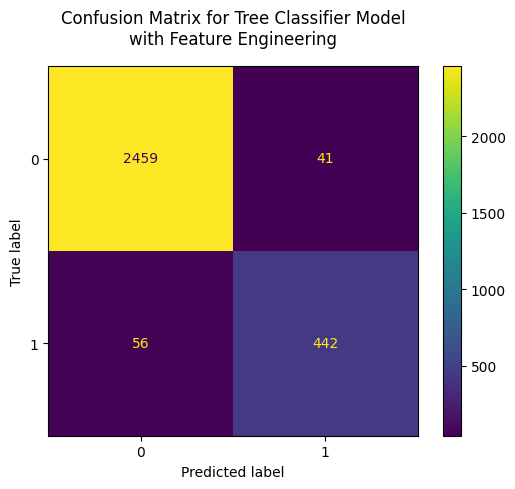

In [137]:
# Use the random forest model to get predictions on the test set
y_pred = tree_clf.predict(X_test)

# Compute values for confusion matrix
tree_cm = confusion_matrix(y_test, y_pred, labels=tree_clf.classes_)

# Create display of confusion matrix
tree_disp = ConfusionMatrixDisplay(confusion_matrix=tree_cm, 
                                  display_labels=tree_clf.classes_)

# Plot confusion matrix
tree_disp.plot(values_format='')

plt.title('Confusion Matrix for Tree Classifier Model\nwith Feature Engineering',pad=16)

# Display and save the plots
plt.show()
fig.savefig('evaluation/cm-treeClassifier-afterFE.png')
plt.close()

---
The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

---

#### Decision tree splits

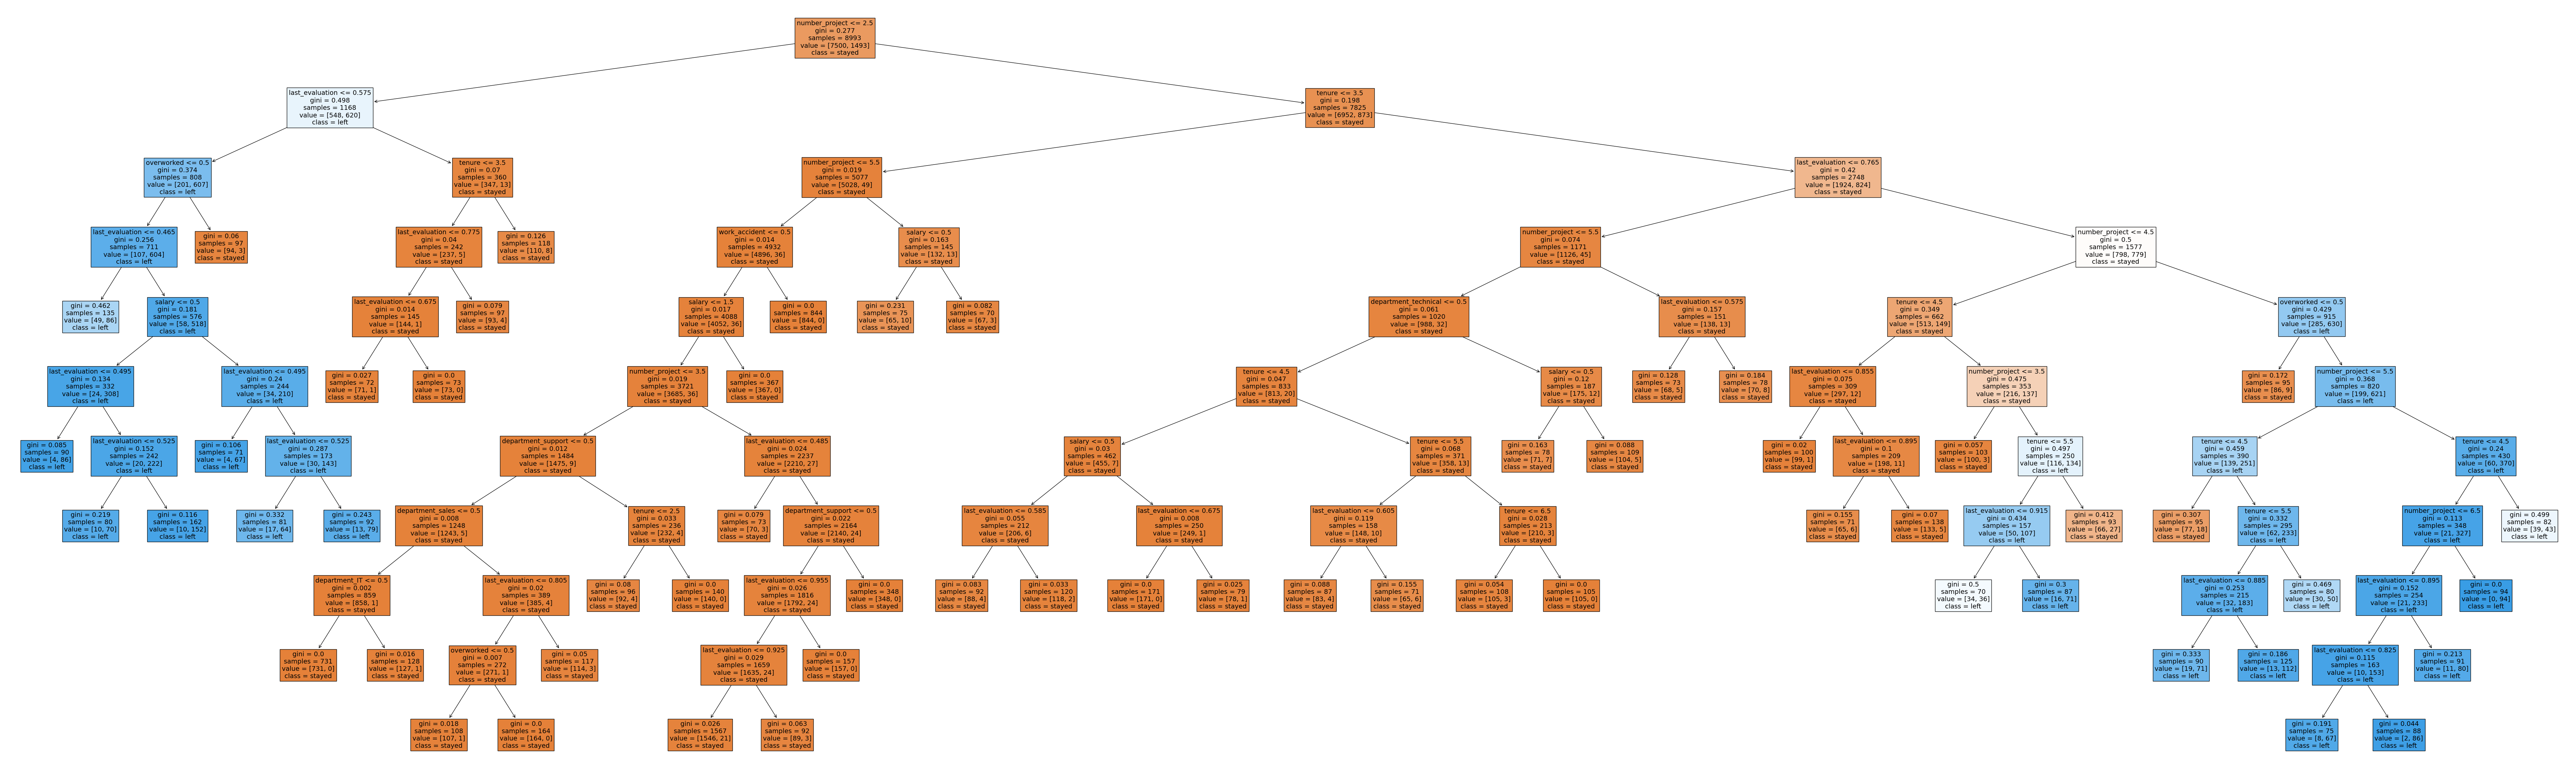

In [138]:
# Plot the tree
fig = plt.figure(figsize=(100,30))
plot_tree(dt3.best_estimator_, max_depth=10, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
# Display and save the plots
plt.show()
fig.savefig('model/tree.png')
plt.close()

#### Decision tree feature importance

In [139]:
dt_importances = pd.DataFrame(dt3.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
dt_importances = dt_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
dt_importances = dt_importances[dt_importances['gini_importance'] != 0]
dt_importances

gini_importance
number_project               0.327957
last_evaluation              0.316068
tenure                       0.247796
overworked                   0.106458
salary                       0.001255
department_technical         0.000277
department_support           0.000095
work_accident                0.000061
department_sales             0.000025
department_IT                0.000007

#### Random forest feature importance

In [140]:
# Get feature importances
feat_impt = rf3.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf3.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]
rf_importances = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
rf_importances = rf_importances.sort_values("Importance", ascending=False)
rf_importances


Feature  Importance
7        number_project    0.390887
8                tenure    0.242454
9       last_evaluation    0.231013
6            overworked    0.103591
3         work_accident    0.015046
5                salary    0.011304
4  department_technical    0.001098
2      department_sales    0.000941
1      department_RandD    0.000915
0    department_support    0.000706

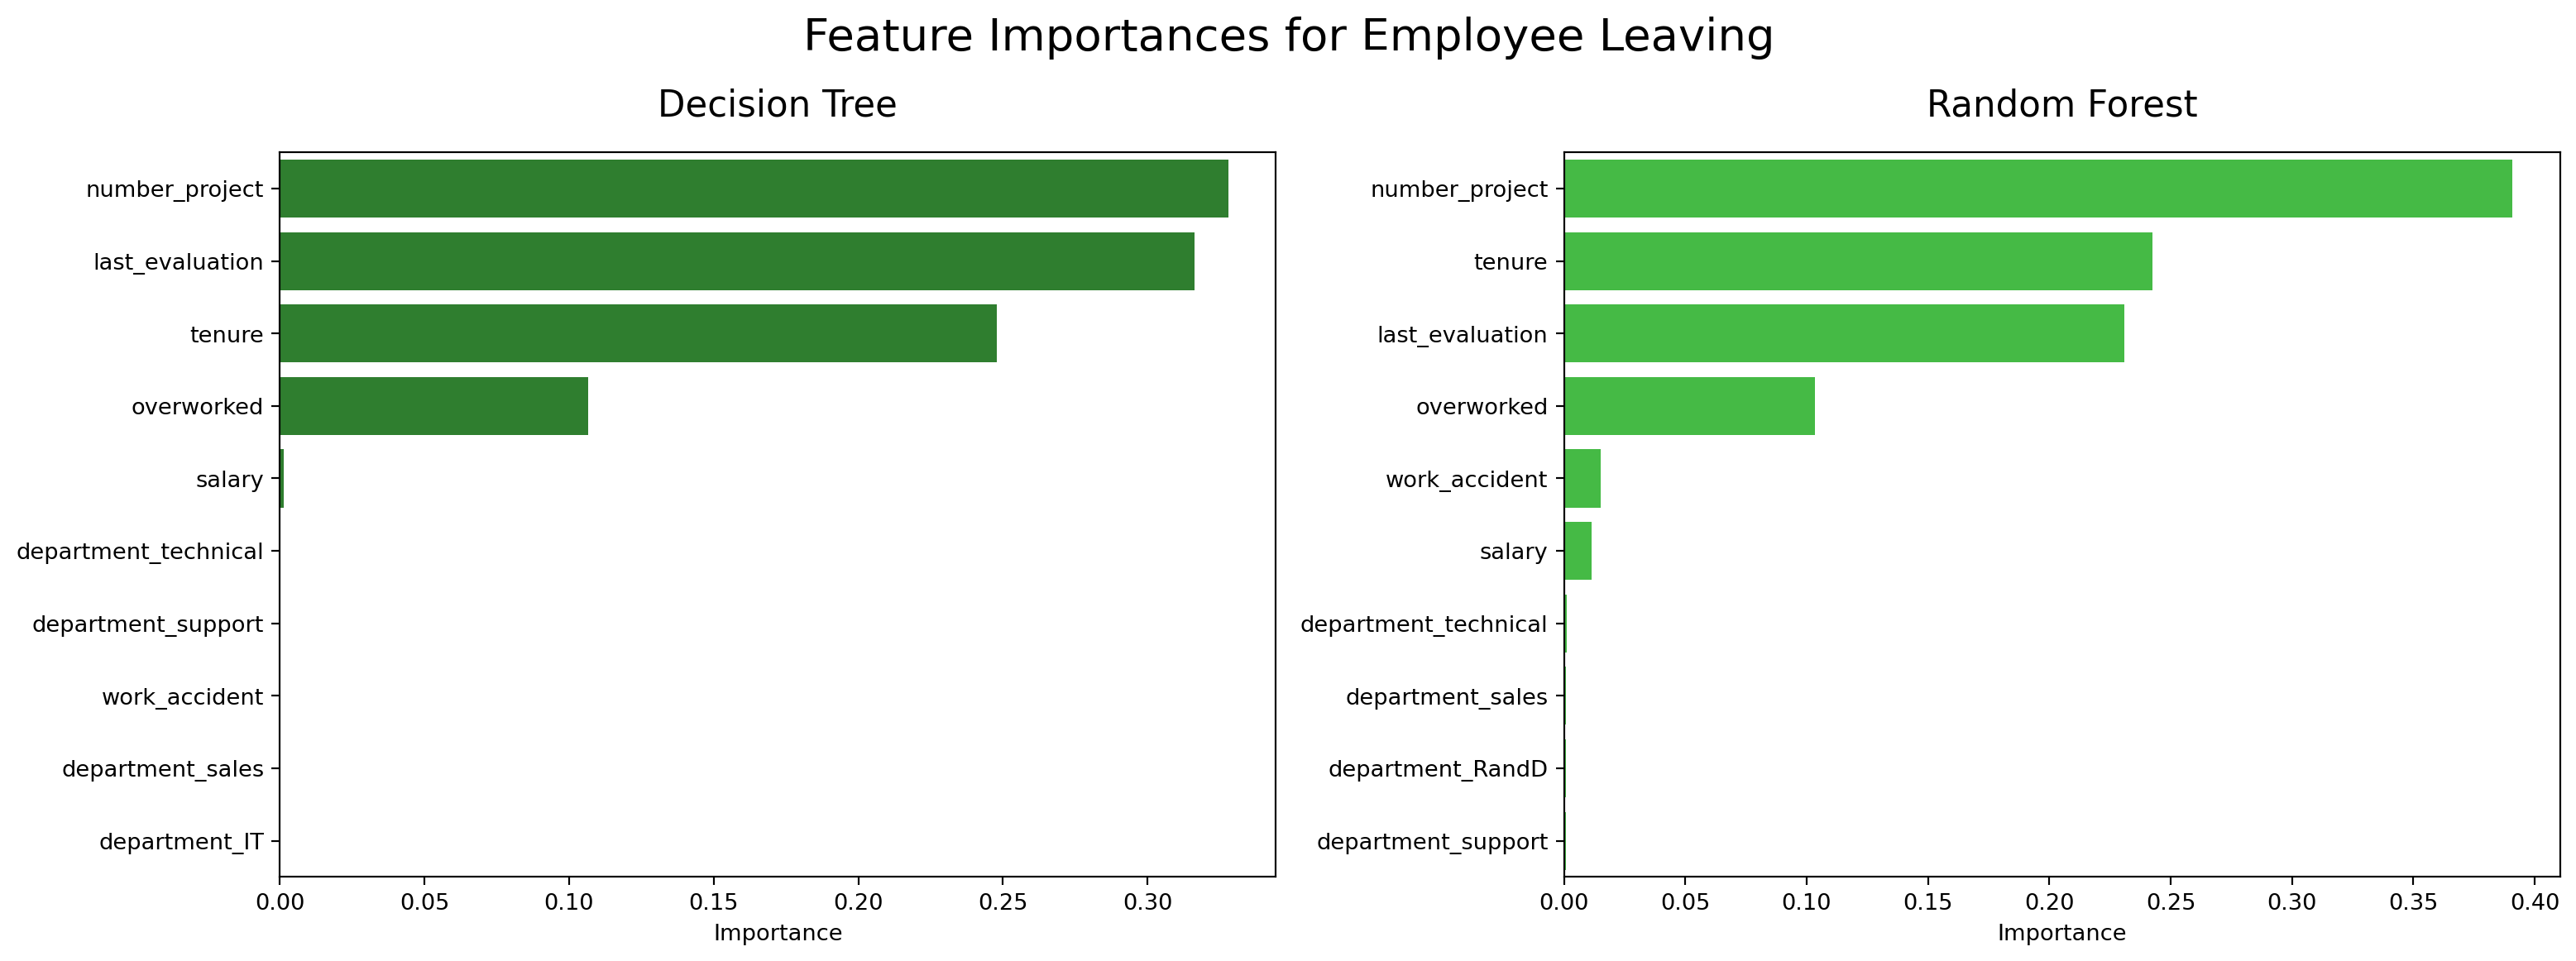

In [141]:
# Set figure and axes
fig, axes = plt.subplots(1,2, figsize=(16,6), dpi=196)

# Plot the feature importances for decision tree model.
sns.barplot(data=dt_importances, x="gini_importance", y=dt_importances.index, 
            orient='h', color='forestgreen',
            ax=axes[0])
axes[0].set_title("Decision Tree", 
          fontsize=16, pad=16)
axes[0].set_ylabel("")
axes[0].set_xlabel("Importance")

# Plot the feature importances for random forest model.
sns.barplot(data=rf_importances, x="Importance", y="Feature", 
            orient='h', color='limegreen',
            ax=axes[1])
axes[1].set_title("Random Forest", 
          fontsize=16, pad=16)
axes[1].set_ylabel("")
axes[1].set_xlabel("Importance")

# Set title and layout
fig.suptitle('Feature Importances for Employee Leaving',
            fontsize=20)
fig.tight_layout()

# Display and save the plots
plt.show()
fig.savefig('model/feature-importances.png')
plt.close()

---
The barplot above shows that in this decision tree model, last_evaluation, number_project, tenure, and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left. These variables are most helpful in predicting the outcome variable, left, and they are the same as the ones used by the random forest model.

---

In [142]:
results

model precision    recall        F1  accuracy       auc
0  LogReg clf test      0.79      0.82       0.8      0.82    0.8857
0           dt1 cv  0.924255  0.886131   0.90466  0.968976  0.972039
0           dt2 cv  0.938336  0.883446  0.909988  0.970978  0.972239
0           rf1 cv  0.983207  0.901533  0.940568  0.981096  0.980721
0           rf2 cv  0.971263  0.902204  0.935416  0.979317  0.982117
0    Tree clf test  0.978723  0.923695  0.950413  0.983989  0.959847
0           dt3 cv  0.822276  0.842603  0.832127  0.943623  0.959904
0           rf3 cv  0.908373   0.87407   0.89077  0.964417  0.968802
0    Tree clf test  0.915114   0.88755  0.901121  0.967645  0.935575

# **<font color=#0aa858>Execute</font> Stage**

## Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.56%, precision of 91.51%, recall of 88.76%, f1-score of 90.11%, and accuracy of 96.76%, on the test set. The random forest modestly outperformed the decision tree model. 

## Conclusion, Recommendations

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 
